# Loading libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans

import math

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch

%matplotlib inline

# Data

In [ ]:
!gdown 1dEfIPmS54zwXG60GHvgt2B-vhJ1Ou7_H
!gdown 1uKk3a3NzXius4L48tUwRV9Y35cyu10l2
!gdown 1rRAAjk5d9hb15I4ehjqc3IwFTq9KH_bi
!gdown 1b17rMHAkBfStJ1k4y92VetViDTiz2iks

Downloading...
From: https://drive.google.com/uc?id=1dEfIPmS54zwXG60GHvgt2B-vhJ1Ou7_H
To: /content/circuit_2024.csv
100% 90.1k/90.1k [00:00<00:00, 3.28MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uKk3a3NzXius4L48tUwRV9Y35cyu10l2
To: /content/lap_2024.csv
100% 5.98M/5.98M [00:00<00:00, 27.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rRAAjk5d9hb15I4ehjqc3IwFTq9KH_bi
To: /content/result_2024.csv
100% 88.3k/88.3k [00:00<00:00, 3.28MB/s]
Downloading...
From: https://drive.google.com/uc?id=1b17rMHAkBfStJ1k4y92VetViDTiz2iks
To: /content/weather_2024.csv
100% 182k/182k [00:00<00:00, 1.99MB/s]


In [ ]:
circuit_data = pd.read_csv('/content/circuit_2024.csv')

In [ ]:
circuit_data.head(3)

EventName TrackMarker            X            Y  Number Letter  \
0  Bahrain Grand Prix     Corners    42.405939  8329.202564       1    NaN   
1  Bahrain Grand Prix     Corners   820.781621  7879.043841       2    NaN   
2  Bahrain Grand Prix     Corners  1912.969997  8065.442167       3    NaN   

        Angle    Distance  
0 -246.615311  710.617854  
1 -101.177469  810.105764  
2 -261.394562  919.675665

In [ ]:
lap_data = pd.read_csv('/content/lap_2024.csv')

<ipython-input-136-bdeca02cb82e>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  lap_data = pd.read_csv('/content/lap_2024.csv')


In [ ]:
lap_data.head(3)

EventName                    Time Driver  DriverNumber  \
0  Bahrain Grand Prix  0 days 01:01:37.510000    VER             1   
1  Bahrain Grand Prix  0 days 01:03:13.806000    VER             1   
2  Bahrain Grand Prix  0 days 01:04:50.559000    VER             1   

                  LapTime  LapNumber  Stint PitOutTime PitInTime  \
0  0 days 00:01:37.284000        1.0    1.0        NaN       NaN   
1  0 days 00:01:36.296000        2.0    1.0        NaN       NaN   
2  0 days 00:01:36.753000        3.0    1.0        NaN       NaN   

              Sector1Time  ... FreshTyre             Team  \
0                     NaN  ...     False  Red Bull Racing   
1  0 days 00:00:30.916000  ...     False  Red Bull Racing   
2  0 days 00:00:30.999000  ...     False  Red Bull Racing   

             LapStartTime             LapStartDate TrackStatus  Position  \
0  0 days 00:59:59.911000  2024-03-02 15:03:42.342          12       1.0   
1  0 days 01:01:37.510000  2024-03-02 15:05:19.941           1       1.0   
2  0 days 01:03:13.806000  2024-03-02 15:06:56.237           1       1.0   

   Deleted  DeletedReason  FastF1Generated IsAccurate  
0    False            NaN            False      False  
1    False            NaN            False       True  
2    False            NaN            False       True  

[3 rows x 32 columns]

In [ ]:
result_data = pd.read_csv('/content/result_2024.csv')

In [ ]:
result_data.head(3)

EventName  DriverNumber BroadcastName Abbreviation  \
0  Bahrain Grand Prix             1  M VERSTAPPEN          VER   
1  Bahrain Grand Prix            11       S PEREZ          PER   
2  Bahrain Grand Prix            55       C SAINZ          SAI   

         DriverId         TeamName TeamColor    TeamId FirstName    LastName  \
0  max_verstappen  Red Bull Racing    3671c6  red_bull       Max  Verstappen   
1           perez  Red Bull Racing    3671c6  red_bull    Sergio       Perez   
2           sainz          Ferrari    e8002d   ferrari    Carlos       Sainz   

   ... CountryCode Position ClassifiedPosition  GridPosition  Q1  Q2  Q3  \
0  ...         NED      1.0                  1           1.0 NaN NaN NaN   
1  ...         MEX      2.0                  2           5.0 NaN NaN NaN   
2  ...         ESP      3.0                  3           4.0 NaN NaN NaN   

                     Time    Status Points  
0  0 days 01:31:44.742000  Finished   26.0  
1  0 days 00:00:22.457000  Finished   18.0  
2  0 days 00:00:25.110000  Finished   15.0  

[3 rows x 22 columns]

In [ ]:
weather_data = pd.read_csv('/content/weather_2024.csv')

In [ ]:
weather_data.head(3)

EventName                    Time  AirTemp  Humidity  Pressure  \
0  Bahrain Grand Prix  0 days 00:00:14.093000     18.9      46.0    1017.1   
1  Bahrain Grand Prix  0 days 00:01:14.084000     18.9      46.0    1017.0   
2  Bahrain Grand Prix  0 days 00:02:14.093000     18.9      46.0    1017.0   

   Rainfall  TrackTemp  WindDirection  WindSpeed  
0     False       26.5            162        0.9  
1     False       26.5             55        1.0  
2     False       26.5             55        1.0

In [ ]:
# Create the team_colors dictionary dynamically, adding '#' prefix
team_colors = {team: f"#{color}" for team, color in result_data[['TeamName', 'TeamColor']].drop_duplicates().values}

# Print or use the updated team_colors dictionary
print(team_colors)

{'Red Bull Racing': '#3671C6', 'Ferrari': '#E80020', 'Mercedes': '#27F4D2', 'McLaren': '#FF8000', 'Aston Martin': '#229971', 'Kick Sauber': '#52e252', 'Haas F1 Team': '#B6BABD', 'RB': '#6692FF', 'Williams': '#64C4FF', 'Alpine': '#0093CC'}


In [ ]:
# Map drivers (by Abbreviation) to their respective team colors
driver_colors = {
    abbreviation: team_colors[team]
    for abbreviation, team in result_data[['Abbreviation', 'TeamName']].drop_duplicates().values
}

# Print or use the driver_colors dictionary
print(driver_colors)

{'VER': '#3671C6', 'PER': '#3671C6', 'SAI': '#E80020', 'LEC': '#E80020', 'RUS': '#27F4D2', 'NOR': '#FF8000', 'HAM': '#27F4D2', 'PIA': '#FF8000', 'ALO': '#229971', 'STR': '#229971', 'ZHO': '#52e252', 'MAG': '#B6BABD', 'RIC': '#6692FF', 'TSU': '#6692FF', 'ALB': '#64C4FF', 'HUL': '#B6BABD', 'OCO': '#0093CC', 'GAS': '#0093CC', 'BOT': '#52e252', 'SAR': '#64C4FF', 'BEA': '#E80020'}


In [ ]:
# Define compound colors
compound_colors = {
    "SOFT": "#C43050",
    "MEDIUM": "#E4C43D",
    "HARD": "#B0B0B0",
    "INTERMEDIATE": "#84C884",
    "WET": "#9EB5C4"
}

compound_colors

{'SOFT': '#C43050',
 'MEDIUM': '#E4C43D',
 'HARD': '#B0B0B0',
 'INTERMEDIATE': '#84C884',
 'WET': '#9EB5C4'}

# EDA

## Position and Lap Time Analysis

### Position by Driver per Race

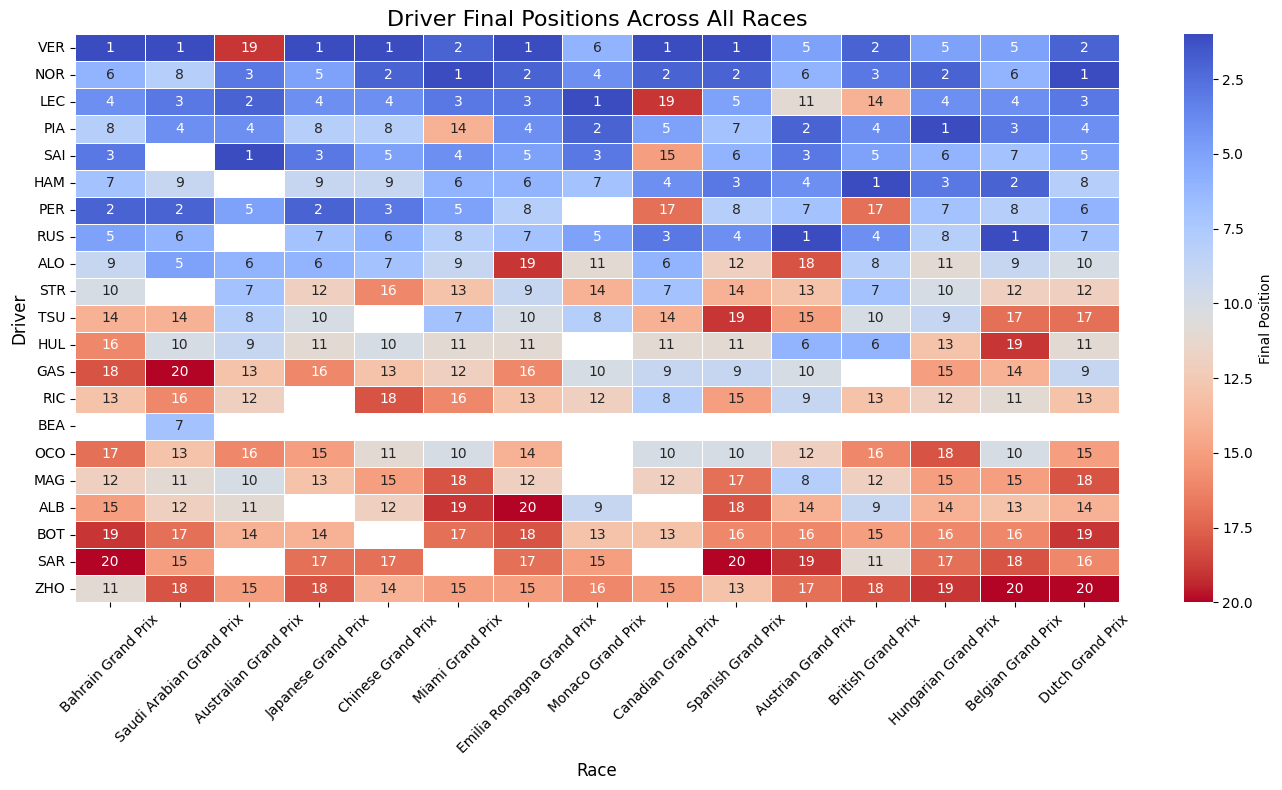

In [ ]:
# Merge lap data with result data to include championship points
merged_data = pd.merge(
    lap_data,
    result_data[['EventName', 'Abbreviation', 'Points']],
    left_on=['EventName', 'Driver'],
    right_on=['EventName', 'Abbreviation'],
    how='left'
)

# Get the final position of each driver for each race by filtering the last lap
final_positions = (
    merged_data
    .loc[merged_data.groupby(['EventName', 'Driver'])['LapNumber'].idxmax()]  # Get the last lap for each driver
    [['EventName', 'Driver', 'Team', 'Position', 'Points']]  # Select relevant columns
)

# Sort the data by points to calculate championship positions
championship_positions = (
    final_positions.groupby('Driver')['Points']
    .sum()
    .reset_index()
    .sort_values(by='Points', ascending=False)
)

# Pivot the data for heatmap (Drivers as rows, Races as columns)
heatmap_data = final_positions.pivot(index='Driver', columns='EventName', values='Position')

# Sort rows (drivers) by championship order
heatmap_data = heatmap_data.reindex(championship_positions['Driver'])

lap_data['LapStartDate'] = pd.to_datetime(lap_data['LapStartDate'])

# Sort columns (races) by chronological order
race_order = (
    lap_data.groupby('EventName')['LapStartDate']
    .min()
    .sort_values()
    .index
)
heatmap_data = heatmap_data[race_order]

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Final Position'}
)

# Invert the color bar manually
cbar = plt.gca().collections[0].colorbar
cbar.ax.invert_yaxis()

# Add title and labels
plt.title('Driver Final Positions Across All Races', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Driver', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.tight_layout()
plt.show()

### Position by Team per Race

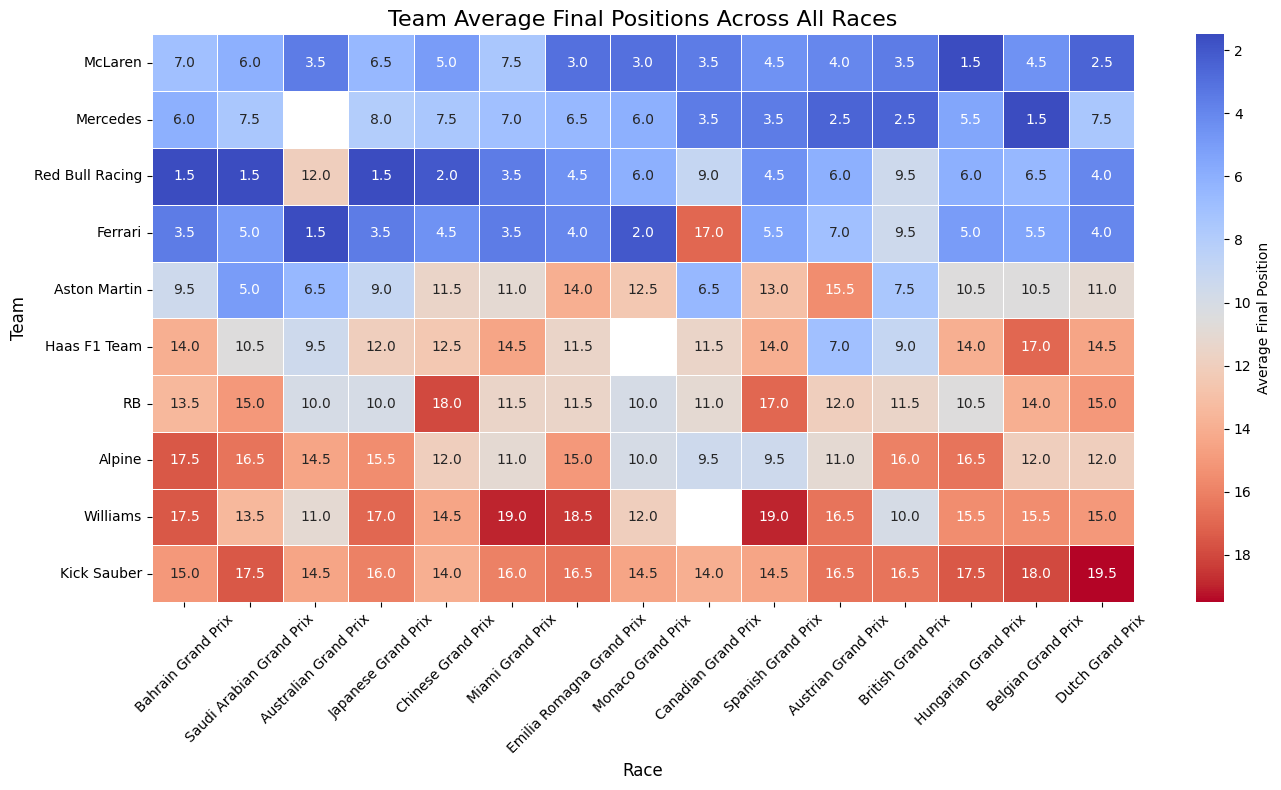

In [ ]:
# Merge lap data with result data to include championship points
merged_data = pd.merge(
    lap_data,
    result_data[['EventName', 'Abbreviation', 'Points']],
    left_on=['EventName', 'Driver'],
    right_on=['EventName', 'Abbreviation'],
    how='left'
)

# Calculate the average position of each team for each race
team_positions = (
    final_positions.groupby(['EventName', 'Team'])['Position']
    .mean()
    .reset_index()
)

# Pivot the data for heatmap (Teams as rows, Races as columns)
team_heatmap_data = team_positions.pivot(index='Team', columns='EventName', values='Position')

# Calculate the sum of final positions for each team across all races
team_ranking = (
    team_heatmap_data.sum(axis=1)  # Sum the positions for each team across races
    .sort_values()  # Sort by total positions (ascending order)
)

# Reorder the team_heatmap_data based on the ranking
ordered_team_heatmap_data = team_heatmap_data.loc[team_ranking.index]

team_heatmap = ordered_team_heatmap_data[race_order]

# Plot the reordered heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    team_heatmap,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Average Final Position'}
)

# Invert the color bar manually
cbar = plt.gca().collections[0].colorbar
cbar.ax.invert_yaxis()

plt.title('Team Average Final Positions Across All Races', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average Lap Time by Driver

In [ ]:
# Filter for valid lap data
valid_laps = lap_data[lap_data['IsAccurate']]

In [ ]:
lap_time_data = valid_laps.copy()

In [ ]:
lap_time_data['LapTime'] = pd.to_timedelta(lap_time_data['LapTime'])
lap_time_data['LapTimeSeconds'] = lap_time_data['LapTime'].dt.total_seconds()

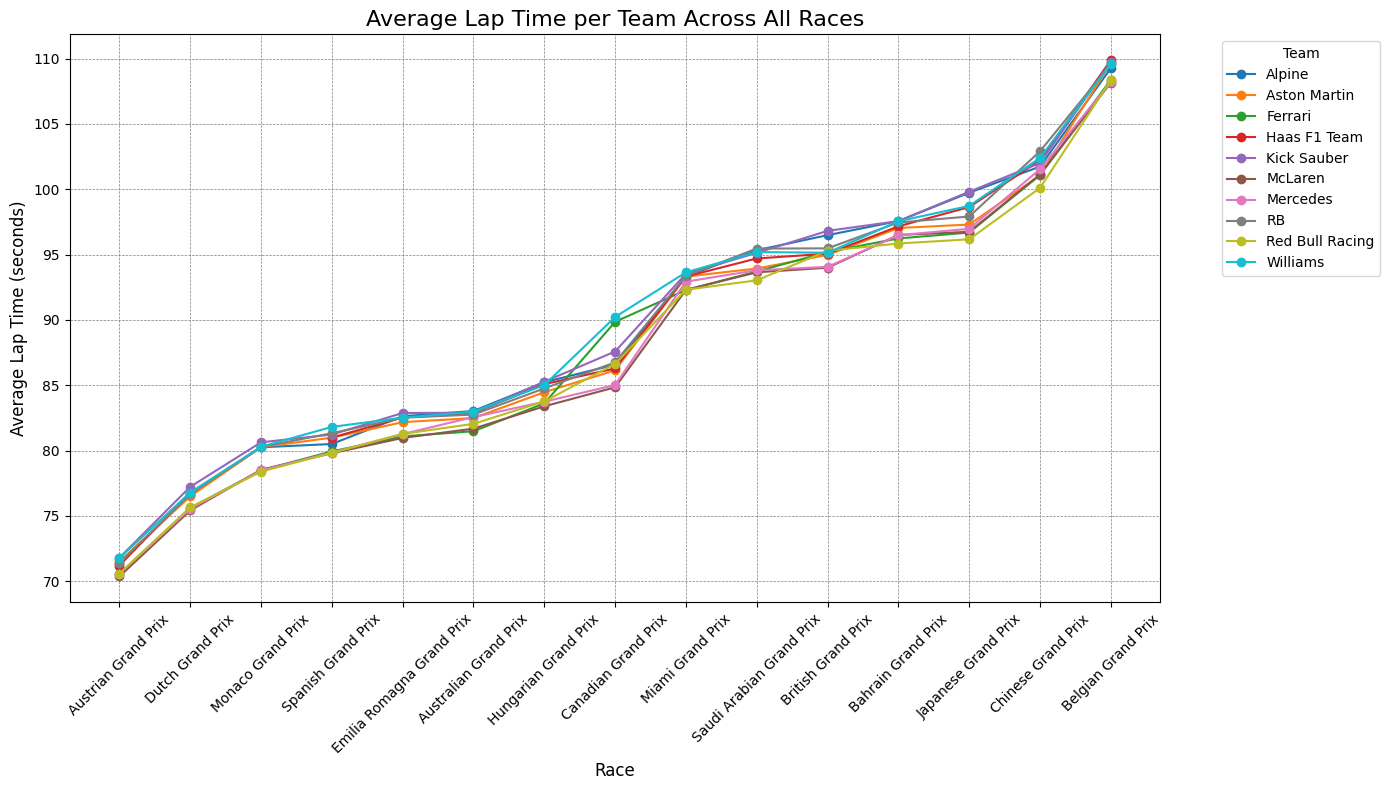

In [ ]:
# Group data to calculate average lap times for each team in each race
average_lap_time_per_team = (
    lap_time_data
    .dropna(subset=['LapTimeSeconds'])
    .groupby(['EventName', 'Team'])['LapTimeSeconds']
    .mean()
    .reset_index()
)

# Filter out Red Bull Racing's data to sort races by their average lap time
red_bull_lap_times = (
    average_lap_time_per_team[average_lap_time_per_team['Team'] == 'Red Bull Racing']
    .sort_values(by='LapTimeSeconds', ascending=True)
)

# Reorder the EventName in the original data based on Red Bull Racing's order
average_lap_time_per_team['EventName'] = pd.Categorical(
    average_lap_time_per_team['EventName'],
    categories=red_bull_lap_times['EventName'],
    ordered=True
)

# Pivot the data to create a matrix for visualization (Races as rows, Teams as columns)
pivot_data = average_lap_time_per_team.pivot(index='EventName', columns='Team', values='LapTimeSeconds')

# Plot the data as a line plot
plt.figure(figsize=(14, 8))

# Plot for each team
for team in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[team], label=team, marker='o', linestyle='-', linewidth=1.5)

# Add title and labels
plt.title('Average Lap Time per Team Across All Races', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Average Lap Time (seconds)', fontsize=12)

# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### Correlation between Sector Times and Lap Time

In [ ]:
# Sector Times Comparison
# Convert sector times from object to timedelta for proper analysis
for sector in ['Sector1Time', 'Sector2Time', 'Sector3Time']:
    lap_time_data[sector] = pd.to_timedelta(lap_time_data[sector])

# Convert sector times to seconds for easier plotting
for sector in ['Sector1Time', 'Sector2Time', 'Sector3Time']:
    lap_time_data[f'{sector}Seconds'] = lap_time_data[sector].dt.total_seconds()

# Define sector names for easier reference
sectors = ['Sector1', 'Sector2', 'Sector3']

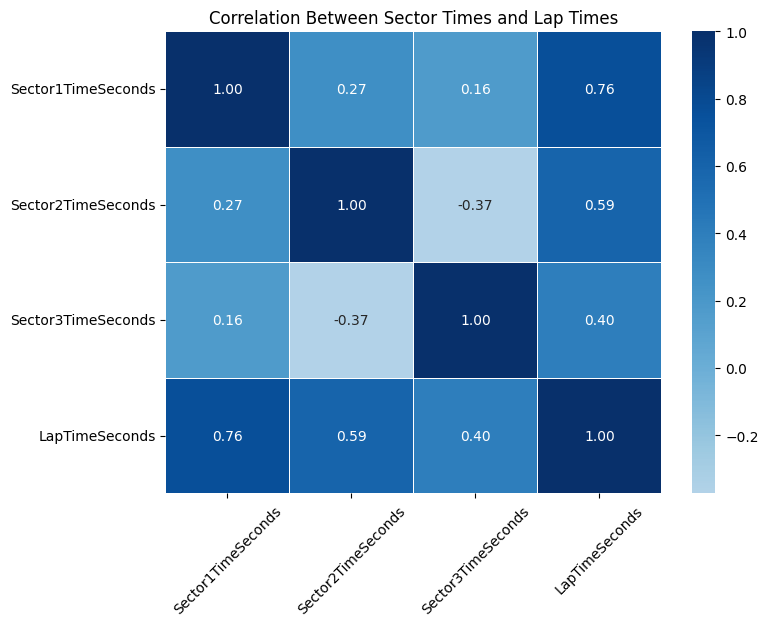

In [ ]:
# Calculate correlation coefficients
sector_times = ['Sector1TimeSeconds', 'Sector2TimeSeconds', 'Sector3TimeSeconds']
lap_times = 'LapTimeSeconds'

# Create a dataframe for correlation
correlation_df = lap_time_data[sector_times + [lap_times]]

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Extract relevant correlations
sector_lap_corr = correlation_matrix.loc[sector_times, lap_times]

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0, fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45)

# Add title and labels
plt.title('Correlation Between Sector Times and Lap Times')
plt.show()

### Average Lap Time per Stint

In [ ]:
# Calculate average lap time per stint and compound in seconds using the filtered data
avg_lap_time_data = lap_time_data.groupby(['Stint', 'Compound'])['LapTimeSeconds'].mean().reset_index()
avg_lap_time_data = avg_lap_time_data[avg_lap_time_data['Stint'] < 5.0]

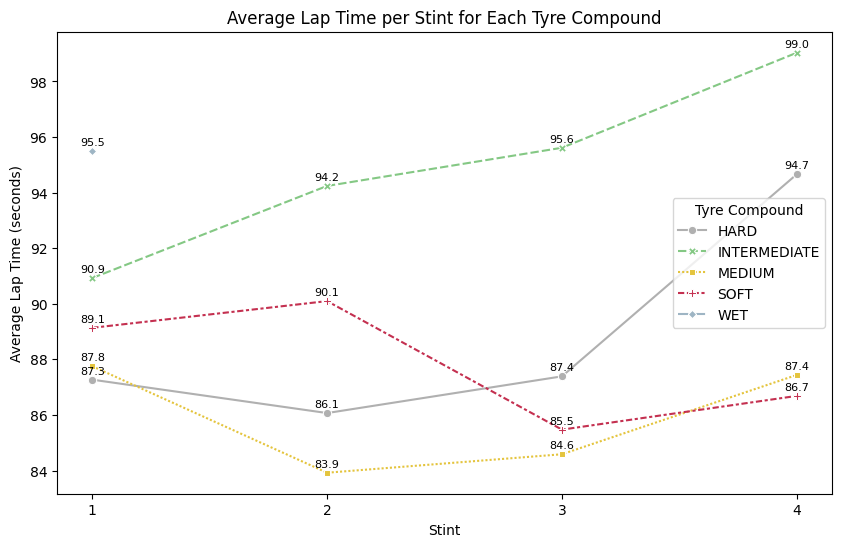

In [ ]:
# Plot average lap time for each compound across stints using filtered data
plt.figure(figsize=(10, 6))
lap_time_line_plot = sns.lineplot(
    data=avg_lap_time_data,
    x='Stint',
    y='LapTimeSeconds',
    hue='Compound',
    style='Compound',
    palette=compound_colors,
    markers=True)

# Add annotations for each point
for line in lap_time_line_plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y + 0.2, f'{y:.1f}', ha='center', fontsize=8)

# Set x-axis ticks to whole numbers
plt.xticks(ticks=[1, 2, 3, 4])

plt.title("Average Lap Time per Stint for Each Tyre Compound")
plt.xlabel("Stint")
plt.ylabel("Average Lap Time (seconds)")
plt.legend(title="Tyre Compound")
plt.show()

### Distribution of Lap Delta Time per Stint

In [ ]:
# Calculate delta time per lap, grouped by Event, Driver, Stint, and Compound
lap_time_data['LapDelta'] = lap_time_data.groupby(['EventName', 'Driver', 'Stint', 'Compound'])['LapTimeSeconds'].diff()

In [ ]:
# Filter out lap delta time that's above 1 second (outliers)
filtered_lap_time_data = lap_time_data[
    (lap_time_data['LapDelta'] >= -1) &
    (lap_time_data['LapDelta'] <= 1) &
    (lap_time_data['Stint'] < 5)
]

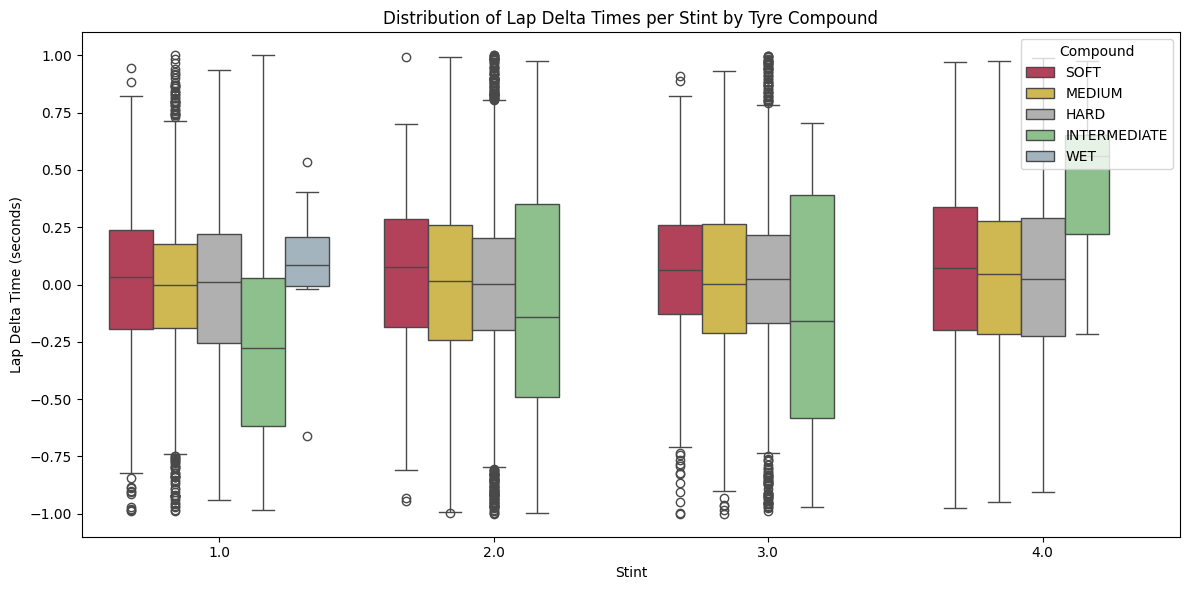

In [ ]:
# Create the boxplot
plt.figure(figsize=(12, 6))
lap_delta_plot = sns.boxplot(
    data=filtered_lap_time_data,
    x='Stint', y='LapDelta', hue='Compound',
    palette=compound_colors
)
lap_delta_plot.set_title('Distribution of Lap Delta Times per Stint by Tyre Compound')
lap_delta_plot.set_ylabel('Lap Delta Time (seconds)')
lap_delta_plot.set_xlabel('Stint')
plt.legend(title="Compound", loc='upper right')
plt.tight_layout()
plt.show()

## Tyre Compounds Analysis

### Tyre Compounds Used During the Race

In [ ]:
# Select relevant columns for tyre compound analysis
compound_data = lap_data[['EventName', 'Driver', 'LapNumber', 'Stint', 'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartDate']]

# Group by team and compound, then count occurrences
compound_usage_matrix = compound_data.groupby(['Team', 'Compound']).size().unstack(fill_value=0)

In [ ]:
compound_data.head(3)

EventName Driver  LapNumber  Stint Compound  TyreLife  FreshTyre  \
0  Bahrain Grand Prix    VER        1.0    1.0     SOFT       4.0      False   
1  Bahrain Grand Prix    VER        2.0    1.0     SOFT       5.0      False   
2  Bahrain Grand Prix    VER        3.0    1.0     SOFT       6.0      False   

              Team            LapStartDate  
0  Red Bull Racing 2024-03-02 15:03:42.342  
1  Red Bull Racing 2024-03-02 15:05:19.941  
2  Red Bull Racing 2024-03-02 15:06:56.237

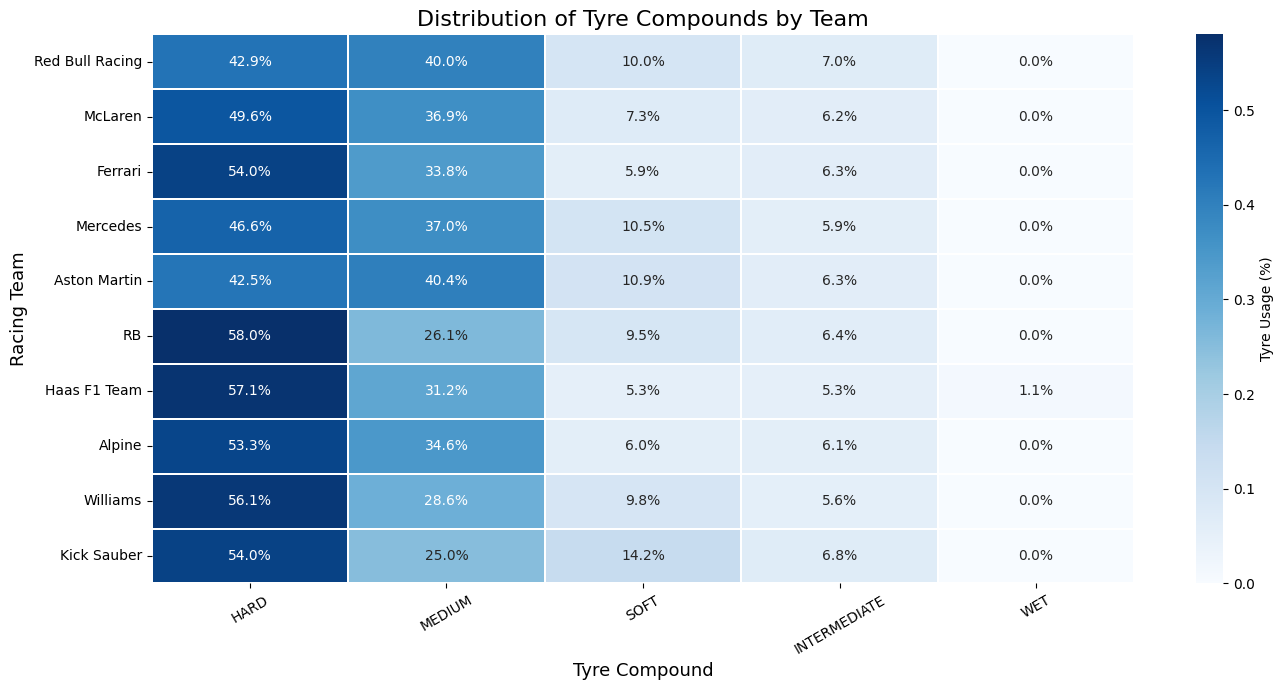

In [ ]:
# Set figure size for the heatmap
plt.figure(figsize=(14, 7))

# Calculate the total points for each team
team_points = (
    result_data.groupby('TeamName')['Points']  # Group by team and sum their points
    .sum()
    .sort_values(ascending=False)  # Sort teams by points in descending order
)

# Reorder the rows in compound_usage_matrix based on team_points
compound_usage_matrix = compound_usage_matrix.loc[team_points.index]

# Reorder the columns to the desired order
order = ['HARD', 'MEDIUM', 'SOFT', 'INTERMEDIATE', 'WET']
compound_usage_matrix = compound_usage_matrix.reindex(columns=order)

# Calculate the proportion of each compound usage per team
compound_distribution = compound_usage_matrix.div(compound_usage_matrix.sum(axis=1), axis=0)

# Create the heatmap
sns.heatmap(
    compound_distribution,
    annot=True,  # Display values on the heatmap
    fmt=".1%",  # Format as percentages
    cmap="Blues",  # Changed the colormap
    linewidths=0.3,  # Adjusted line widths
    cbar_kws={'label': 'Tyre Usage (%)'}  # Changed color bar label
)

# Add titles and labels
plt.title("Distribution of Tyre Compounds by Team", fontsize=16)
plt.ylabel("Racing Team", fontsize=13)
plt.xlabel("Tyre Compound", fontsize=13)
plt.xticks(rotation=30)  # Adjust x-axis tick rotation
plt.yticks(rotation=0)  # Ensure y-axis ticks are readable
plt.tight_layout()  # Optimize layout for better spacing
plt.show()

### Weather trends and impact on Tyre Strategy

In [ ]:
weather_data['Time'] = pd.to_timedelta(weather_data['Time'])

In [ ]:
weather_data['Time (Minutes)'] = weather_data['Time'].apply(lambda x: x.total_seconds() / 60)

In [ ]:
weather_data

EventName                   Time  AirTemp  Humidity  Pressure  \
0     Bahrain Grand Prix 0 days 00:00:14.093000     18.9      46.0    1017.1   
1     Bahrain Grand Prix 0 days 00:01:14.084000     18.9      46.0    1017.0   
2     Bahrain Grand Prix 0 days 00:02:14.093000     18.9      46.0    1017.0   
3     Bahrain Grand Prix 0 days 00:03:14.090000     18.9      45.0    1017.0   
4     Bahrain Grand Prix 0 days 00:04:14.091000     18.9      46.0    1017.0   
...                  ...                    ...      ...       ...       ...   
2283    Dutch Grand Prix 0 days 02:28:40.944000     19.3      57.0    1019.9   
2284    Dutch Grand Prix 0 days 02:29:40.939000     19.3      57.0    1019.9   
2285    Dutch Grand Prix 0 days 02:30:40.913000     19.3      57.0    1019.9   
2286    Dutch Grand Prix 0 days 02:31:40.918000     19.5      57.0    1020.0   
2287    Dutch Grand Prix 0 days 02:32:40.913000     19.3      58.0    1020.0   

      Rainfall  TrackTemp  WindDirection  WindSpeed  Time (Minutes)  
0        False       26.5            162        0.9        0.234883  
1        False       26.5             55        1.0        1.234733  
2        False       26.5             55        1.0        2.234883  
3        False       26.2             85        1.1        3.234833  
4        False       26.2            178        1.0        4.234850  
...        ...        ...            ...        ...             ...  
2283     False       31.8            203        4.3      148.682400  
2284     False       31.8            203        4.3      149.682317  
2285     False       31.8            203        4.3      150.681883  
2286     False       30.8            233        4.5      151.681967  
2287     False       30.7            220        5.9      152.681883  

[2288 rows x 10 columns]

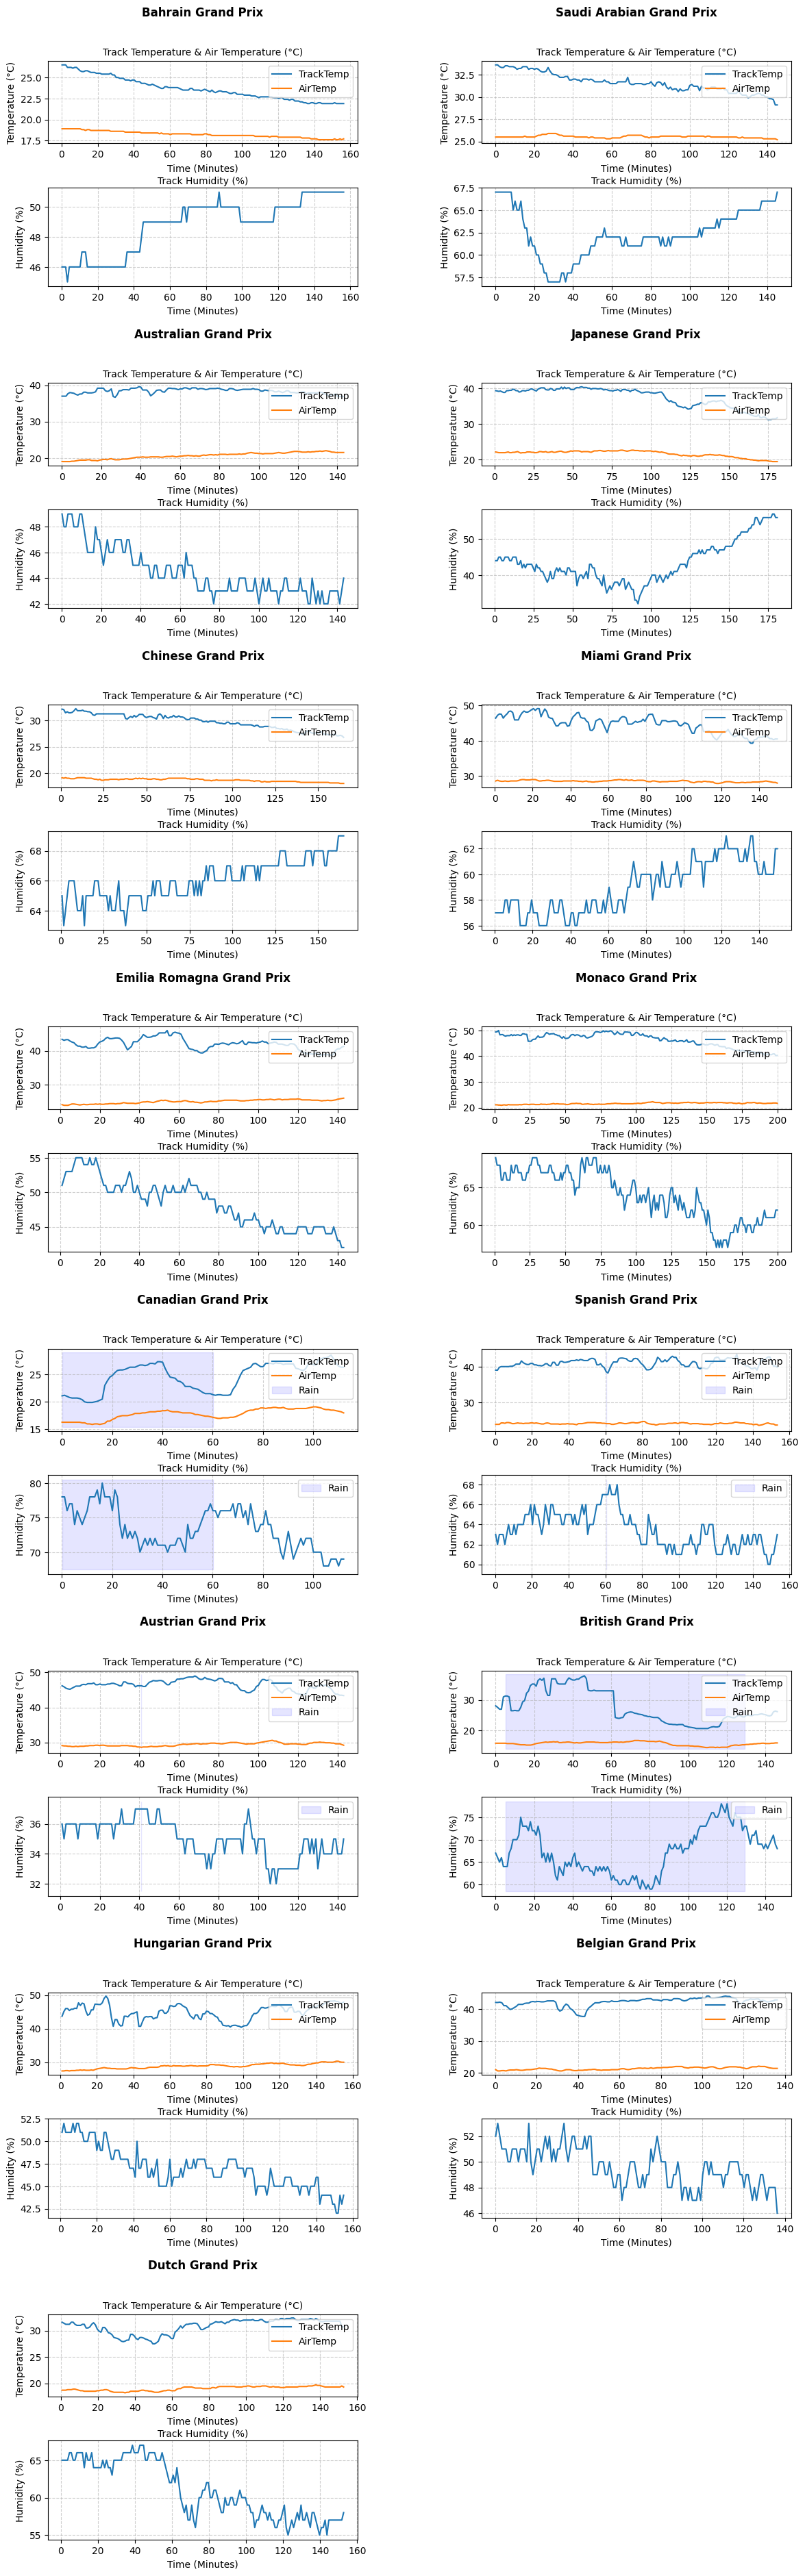

In [ ]:
# Number of races and subplot configuration
n_races = len(weather_data['EventName'].unique())
n_cols = 2  # Two races per row
n_rows = (n_races + n_cols - 1) // n_cols  # Rows needed for all races

# Set up the figure and grid layout
fig = plt.figure(figsize=(14, n_rows * 6))  # Adjust figure size
grid = plt.GridSpec(
    n_rows * 3, n_cols,
    height_ratios=[0.1, 1, 1.2] * n_rows,  # Adjusted ratios
    hspace=0.7,  # Increased hspace
    wspace=0.4   # Maintained wspace
)

# Iterate over races
for idx, race in enumerate(weather_data['EventName'].unique()):
    row, col = divmod(idx, n_cols)  # Determine the grid position
    race_data = weather_data[weather_data['EventName'] == race]

    # Super Title for the Race
    ax_super = fig.add_subplot(grid[row * 3, col])
    ax_super.axis('off')  # Turn off the axis for the super title
    ax_super.text(
        0.5, 0.5, f'{race}', fontsize=12, weight='bold', ha='center', va='center'
    )  # Centered race title in the allocated grid cell

    # Top Plot: TrackTemp and AirTemp
    ax1 = fig.add_subplot(grid[row * 3 + 1, col])  # First plot
    sns.lineplot(data=race_data, x='Time (Minutes)', y='TrackTemp', label='TrackTemp', ax=ax1)
    sns.lineplot(data=race_data, x='Time (Minutes)', y='AirTemp', label='AirTemp', ax=ax1)
    if 'Rainfall' in race_data.columns and race_data['Rainfall'].any():
        ax1.fill_between(
            race_data[race_data['Rainfall'] == True]['Time (Minutes)'],
            race_data['TrackTemp'].max() + 0.5,
            race_data['AirTemp'].min() - 0.5,
            color='blue', alpha=0.1, label='Rain'
        )
    # Check if there are any labels in the legend before adding it
    if ax1.get_legend_handles_labels()[1]:  # Check if there are labels
        ax1.legend(loc='upper right')
    ax1.set_title('Track Temperature & Air Temperature (°C)', fontsize=10, pad=6)  # Adjusted padding
    ax1.set_ylabel('Temperature (°C)')
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Bottom Plot: Humidity
    ax2 = fig.add_subplot(grid[row * 3 + 2, col])  # Second plot
    sns.lineplot(data=race_data, x='Time (Minutes)', y='Humidity', ax=ax2)
    if 'Rainfall' in race_data.columns and race_data['Rainfall'].any():
        ax2.fill_between(
            race_data[race_data['Rainfall'] == True]['Time (Minutes)'],
            race_data['Humidity'].max() + 0.5,
            race_data['Humidity'].min() - 0.5,
            color='blue', alpha=0.1, label='Rain'
        )
        # Add legend if labels exist
        if ax2.get_legend_handles_labels()[1]:
            ax2.legend(loc='upper right')
    ax2.set_title('Track Humidity (%)', fontsize=10, pad=4)  # Adjusted padding
    ax2.set_ylabel('Humidity (%)')
    ax2.set_xlabel('Time (Minutes)')
    ax2.grid(True, linestyle='--', alpha=0.6)

# Show the plots
plt.show()

In [ ]:
rainfall_data = weather_data[(weather_data['TrackTemp'] < 35) & (weather_data['Rainfall'] == True)]

In [ ]:
no_rainfall_data = weather_data[weather_data['Rainfall'] == False]

# Combine filtered data for the plot
filtered_weather_data = pd.concat([rainfall_data, no_rainfall_data])

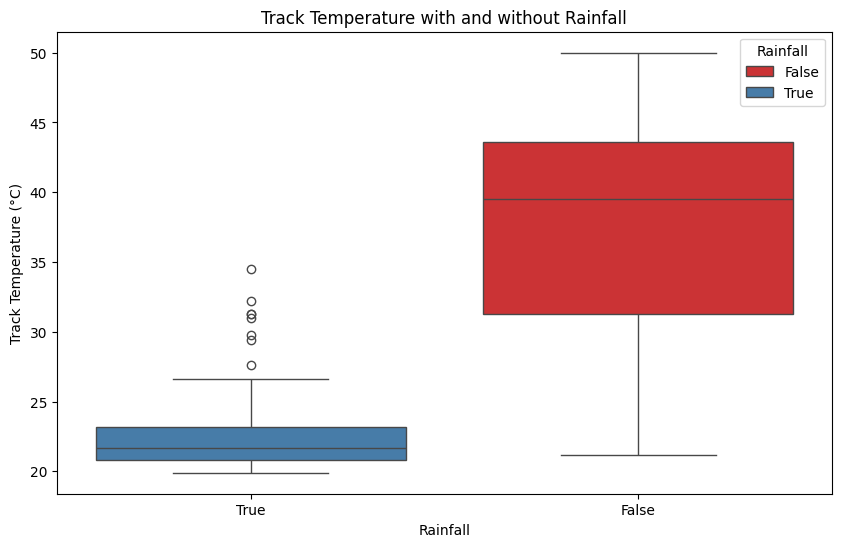

In [ ]:
# Rainfall Impact on Track Conditions
rainfall_order = ['True', 'False']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rainfall',
            y='TrackTemp',
            hue='Rainfall',
            data=filtered_weather_data,
            palette='Set1',
            order=rainfall_order)

# Add title and labels
plt.title('Track Temperature with and without Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Track Temperature (°C)')

# Show plot
plt.show()

In [ ]:
# Calculate summary metrics for each race
race_metrics = weather_data.groupby('EventName').agg({
    'TrackTemp': ['mean', 'min', 'max'],
    'AirTemp': ['mean', 'min', 'max'],
    'Humidity': ['mean', 'min', 'max']
}).reset_index()

# Flatten column names
race_metrics.columns = [
    'EventName', 'AvgTrackTemp', 'MinTrackTemp', 'MaxTrackTemp',
    'AvgAirTemp', 'MinAirTemp', 'MaxAirTemp',
    'AvgHumidity', 'MinHumidity', 'MaxHumidity'
]

# Perform clustering on AvgTrackTemp, AvgAirTemp, and AvgHumidity
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
race_metrics['Cluster'] = kmeans.fit_predict(
    race_metrics[['AvgTrackTemp', 'AvgAirTemp', 'AvgHumidity']]
)

# Create a DataFrame to display race metrics with cluster assignments
race_metrics_df = race_metrics[['EventName', 'AvgTrackTemp', 'AvgAirTemp', 'AvgHumidity', 'Cluster']]

# Save the data to a CSV (optional, for future use in the dashboard)
race_metrics_df.to_csv("race_clusters.csv", index=False)

# Create a DataFrame to display race metrics with cluster assignments
race_metrics_df = race_metrics[['EventName', 'AvgTrackTemp', 'AvgAirTemp', 'AvgHumidity', 'Cluster']]

# Save the data to a CSV (optional, for future use in the dashboard)
race_metrics_df.to_csv("race_clusters.csv", index=False)

race_metrics_df

EventName  AvgTrackTemp  AvgAirTemp  AvgHumidity  Cluster
0       Australian Grand Prix     38.402083   20.622222    44.451389        1
1         Austrian Grand Prix     46.420979   29.425874    35.006993        1
2          Bahrain Grand Prix     23.652866   18.227389    48.821656        3
3          Belgian Grand Prix     42.267153   21.328467    49.583942        1
4          British Grand Prix     27.670068   15.770748    67.333333        2
5         Canadian Grand Prix     24.569912   17.797345    73.380531        2
6          Chinese Grand Prix     29.792727   18.639394    66.060606        2
7            Dutch Grand Prix     30.805882   19.005882    60.960784        2
8   Emilia Romagna Grand Prix     42.023776   25.113986    48.426573        1
9        Hungarian Grand Prix     44.916129   28.823871    46.922581        1
10        Japanese Grand Prix     37.501105   21.691160    43.430939        1
11           Miami Grand Prix     44.664000   28.522000    59.006667        0
12          Monaco Grand Prix     46.318000   21.596500    63.990000        0
13   Saudi Arabian Grand Prix     31.593151   25.528082    62.335616        2
14         Spanish Grand Prix     41.096104   24.132468    63.441558        0

<ipython-input-169-a5d89c700fd7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_metrics_df['Category'] = race_metrics_df.apply(categorize_races, axis=1)


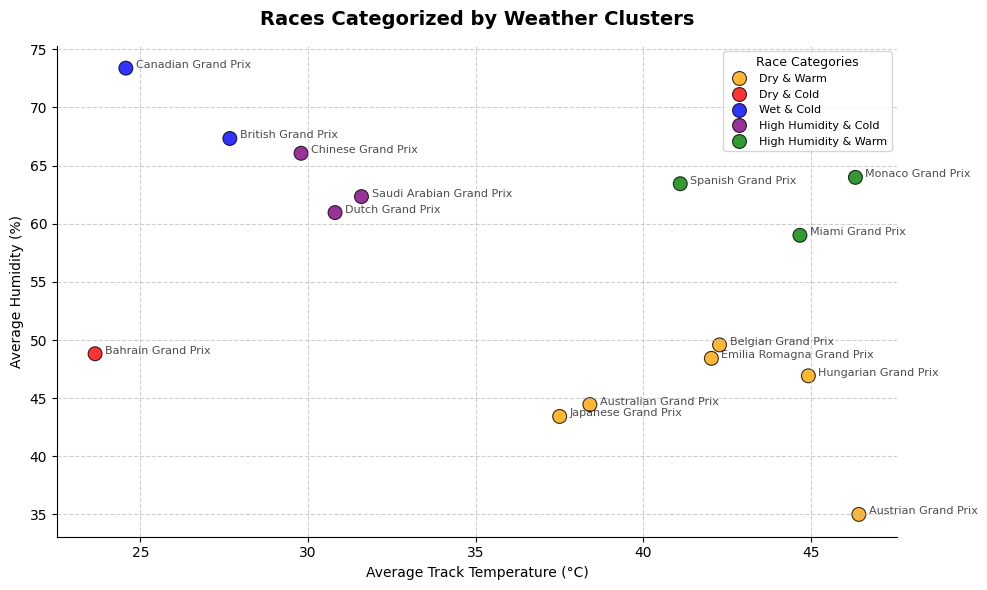

In [ ]:
# Categorize races based on conditions
def categorize_races(row):
    if row['Cluster'] == 2 and row['EventName'] in ["British Grand Prix", "Canadian Grand Prix"]:
        return "Wet & Cold"
    elif row['Cluster'] == 2:
        return "High Humidity & Cold"
    elif row['Cluster'] == 0:
        return "High Humidity & Warm"
    elif row['Cluster'] == 3:
        return "Dry & Cold"
    elif row['Cluster'] == 1:
        return "Dry & Warm"
    return "Uncategorized"

race_metrics_df['Category'] = race_metrics_df.apply(categorize_races, axis=1)

# Define custom color mapping for categories
color_mapping = {
    "Wet & Cold": "blue",
    "High Humidity & Cold": "purple",
    "High Humidity & Warm": "green",
    "Dry & Cold": "red",
    "Dry & Warm": "orange"
}

# Create a smaller scatter plot with no borders except x and y axes
plt.figure(figsize=(10, 6))  # Adjust figure size for a smaller plot
sns.scatterplot(
    data=race_metrics_df,
    x="AvgTrackTemp",
    y="AvgHumidity",
    hue="Category",
    palette=color_mapping,
    s=100,
    edgecolor="black",
    alpha=0.8
)

# Annotate each race name
for i, row in race_metrics_df.iterrows():
    plt.text(
        row['AvgTrackTemp'] + 0.3,  # Slight offset for better visibility
        row['AvgHumidity'],
        row['EventName'],
        fontsize=8,
        alpha=0.7
    )

# Add plot titles and labels
plt.title("Races Categorized by Weather Clusters", fontsize=14, weight='bold', pad=15)
plt.xlabel("Average Track Temperature (°C)", fontsize=10)
plt.ylabel("Average Humidity (%)", fontsize=10)

# Customize the legend
plt.legend(title="Race Categories", fontsize=8, title_fontsize=9, loc="upper right")

# Remove plot borders except for x and y axes
plt.gca().spines['top'].set_visible(False)    # Remove top border
plt.gca().spines['right'].set_visible(False)  # Remove right border

# Customize grid and layout adjustments
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Show the updated plot
plt.show()

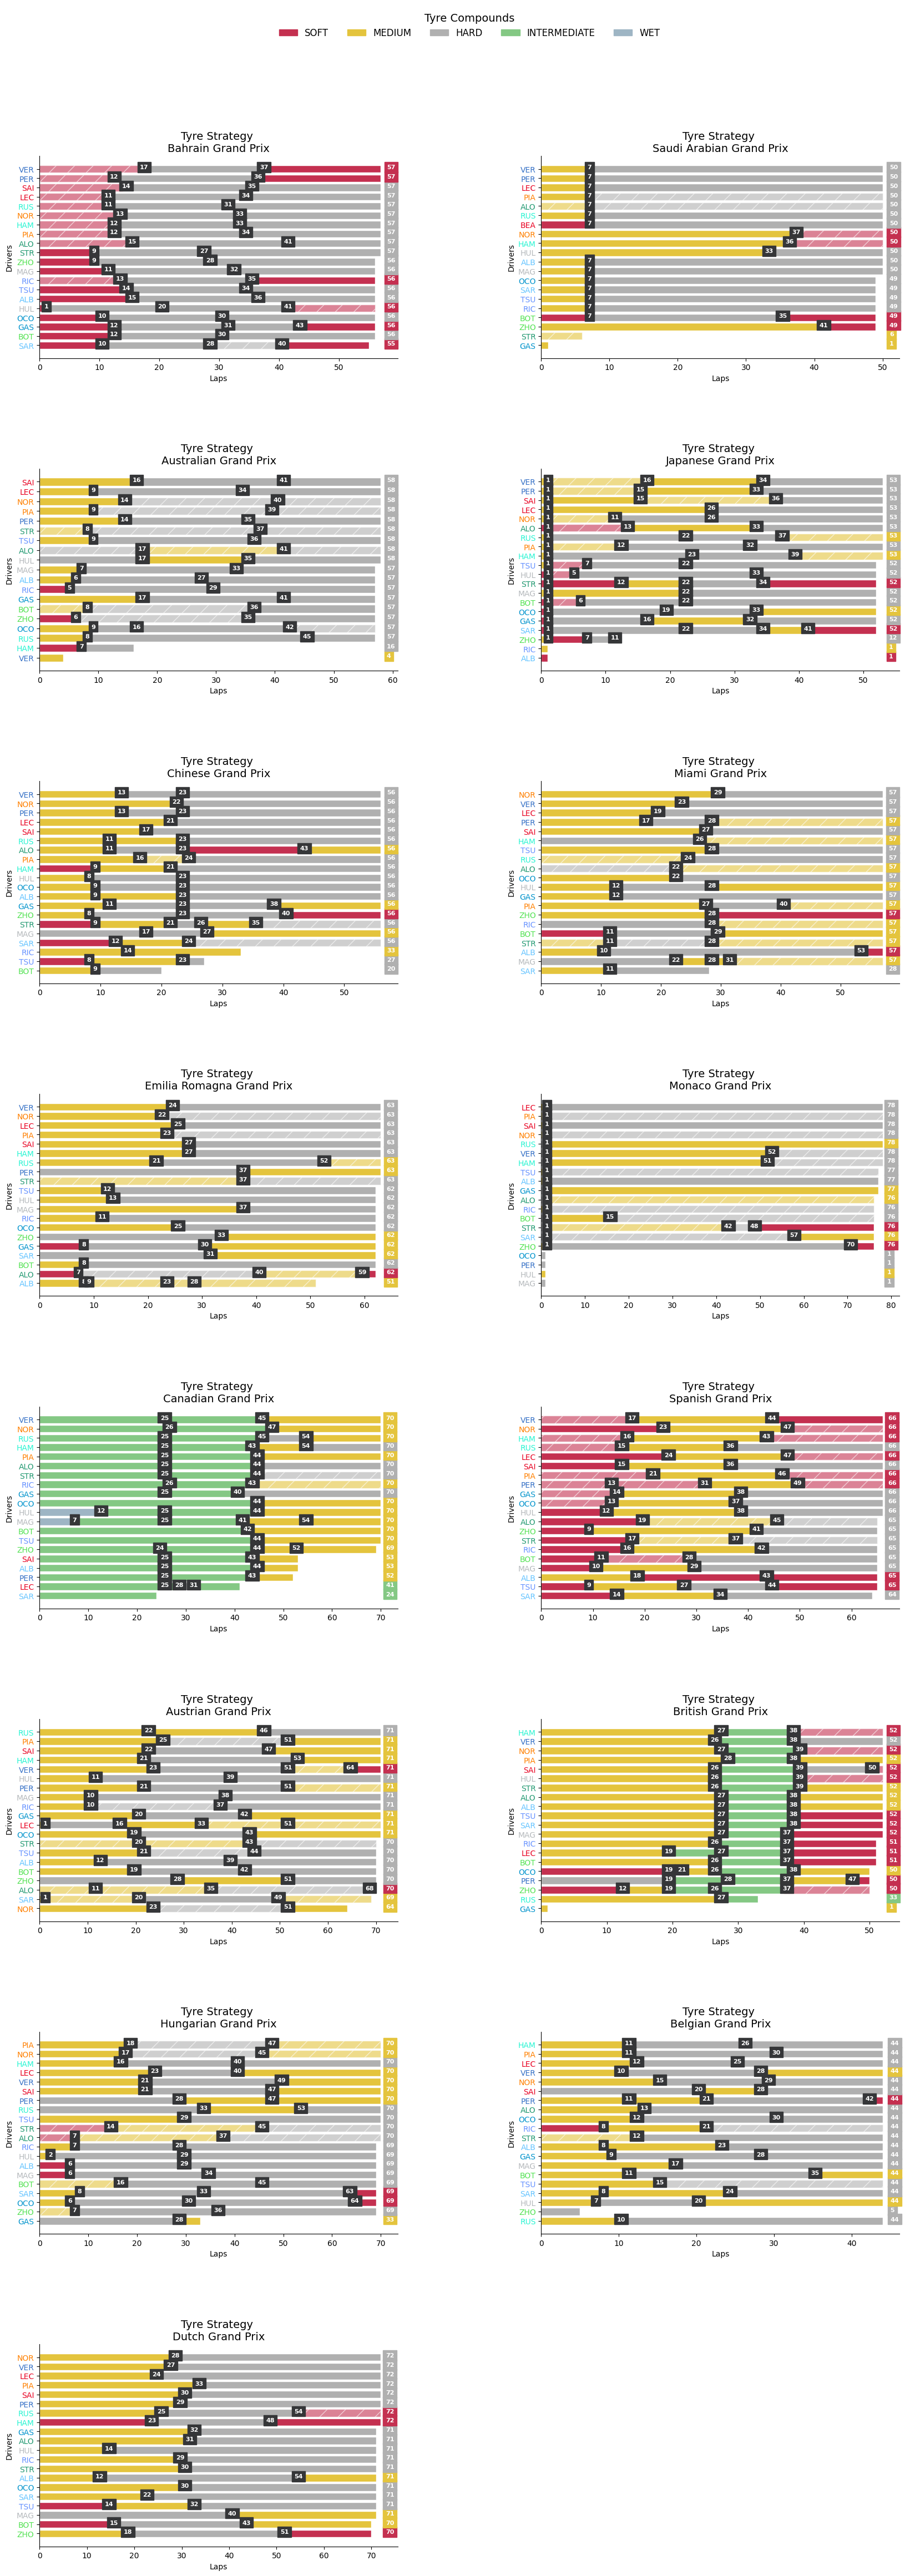

In [ ]:
# Define the compound legend
compound_legend = [
    mpatches.Patch(color=color, label=compound)
    for compound, color in compound_colors.items()
]

# Determine number of rows and columns for the races
n_races = len(lap_data['EventName'].unique())
n_cols = 2
n_rows = (n_races + n_cols - 1) // n_cols

# Create a grid layout with additional space for the legend
fig = plt.figure(figsize=(20, (n_rows + 0.5) * 7))  # Adjust overall height
grid = GridSpec(n_rows + 1, n_cols, height_ratios=[0.2] + [1] * n_rows, hspace=0.6, wspace=0.4)

# Add the compound legend to the dedicated top row
legend_ax = fig.add_subplot(grid[0, :])
legend_ax.axis('off')  # Hide axis for the legend section
legend_ax.legend(
    handles=compound_legend,
    title="Tyre Compounds",
    loc='center',
    ncol=len(compound_colors),
    fontsize=12,  # Increased font size for legend items
    title_fontsize=14,  # Increased font size for legend title
    frameon=False
)

# Iterate through races and plot
for idx, race in enumerate(lap_data['EventName'].unique()):
    row, col = divmod(idx, n_cols)
    ax = fig.add_subplot(grid[row + 1, col])  # Offset by 1 row due to legend
    ax.set_title(f'Tyre Strategy \n{race}', fontsize=14)
    ax.set_xlabel('Laps', fontsize=10)
    ax.set_ylabel('Drivers', fontsize=10)
    ax.grid(False)

    # Get data for the current race
    race_data = lap_data[lap_data['EventName'] == race]
    compound_stint = race_data.groupby(['Driver', 'Stint', 'Compound', 'FreshTyre']).agg({
        'LapNumber': 'min',
        'TyreLife': 'count'
    }).reset_index()

    # Get drivers for the current race
    driver_data = result_data[result_data['EventName'] == race]

    # Plot each driver's stint
    for driver in list(driver_data['Abbreviation'])[::-1]:
        driver_stints = compound_stint[compound_stint['Driver'] == driver]

        for _, row in driver_stints.iterrows():
            ax.barh(
                y=driver,
                width=row["TyreLife"],
                left=max(row['LapNumber'] - 1, 0),
                color=compound_colors[row.Compound],
                edgecolor="white",
                fill=True,
                alpha=0.6 if not row.FreshTyre else 1,
                hatch="/" if not row.FreshTyre else None
            )

            # Annotate stint starting lap
            if row['LapNumber'] > 1.0:
                ax.text(
                    row['LapNumber'] - 1.25,
                    driver,
                    round(row['LapNumber'] - 1),
                    fontweight='extra bold',
                    backgroundcolor= '#353638',
                    color='white',
                    fontsize=8
                )

        # Annotate total laps
        max_lap = race_data['LapNumber'].max()
        ax.text(
            max_lap + 1,
            driver,
            driver_stints['TyreLife'].sum(),
            fontweight='extra bold',
            # backgroundcolor='black',
            backgroundcolor=compound_colors[row.Compound],
            color='white',
            fontsize=8
        )

    # Customize y-axis driver labels with driver colors
    for label in ax.get_yticklabels():
        driver_name = label.get_text()
        label.set_color(driver_colors.get(driver_name))  # Use driver colors

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Show the final layout
plt.show()

In [ ]:
# Convert LapStartDate to datetime format
compound_data['LapStartDate'] = pd.to_datetime(compound_data['LapStartDate'])

# Calculate the usage of tyre compounds across races
compound_usage = (
    compound_data.groupby(['EventName', 'Compound'])
    .size()
    .unstack(fill_value=0)  # Pivot table: EventName as index, Compound as columns
    .reindex(
        compound_data.groupby('EventName')['LapStartDate']
        .min()
        .sort_values()
        .index  # Sort races by their earliest LapStartDate
    )
)

<ipython-input-171-d73086ed9fea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compound_data['LapStartDate'] = pd.to_datetime(compound_data['LapStartDate'])


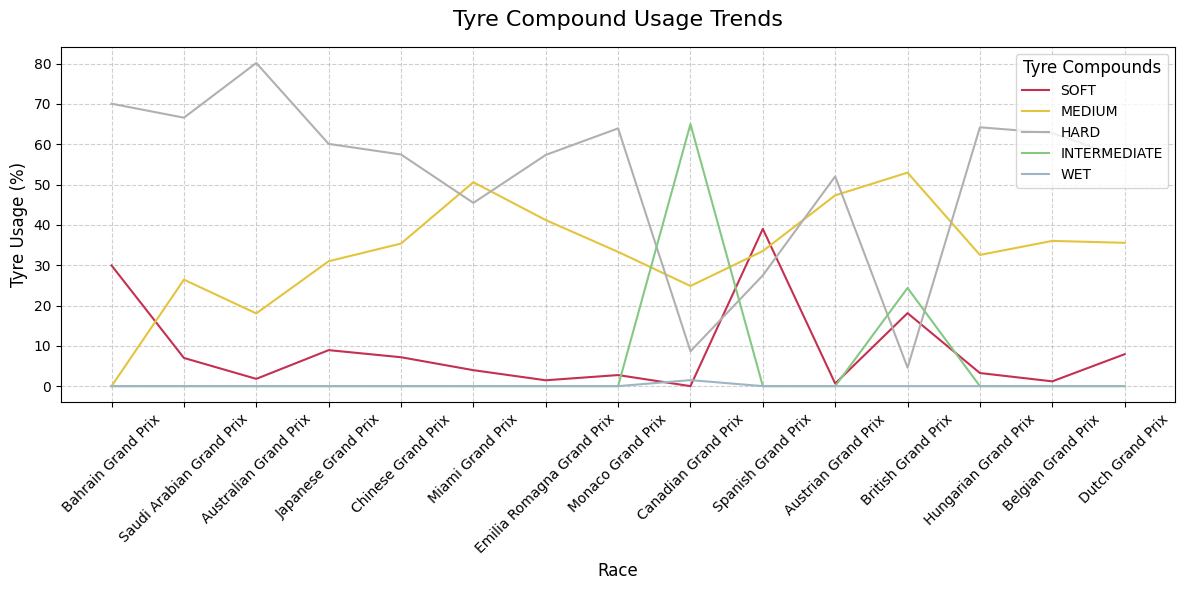

In [ ]:
# Plotting the compound usage trends
fig, ax = plt.subplots(figsize=(12, 6))

# Normalize counts to percentages
compound_usage_percent = compound_usage.div(compound_usage.sum(axis=1), axis=0) * 100  # Convert to percentages

# Iterate through the compounds and plot their trends as percentages
for compound, color in compound_colors.items():
    if compound in compound_usage_percent.columns:
        ax.plot(
            compound_usage_percent.index,  # Races as x-axis
            compound_usage_percent[compound],  # Compound usage as y-axis in percentages
            label=compound,  # Add legend label for each compound
            color=color  # Use predefined colors for compounds
        )

# Customize the chart appearance
ax.set_title('Tyre Compound Usage Trends', fontsize=16, pad=15)
ax.set_ylabel('Tyre Usage (%)', fontsize=12)
ax.set_xlabel('Race', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(title="Tyre Compounds", title_fontsize=12, fontsize=10)

# Optimize layout and display the chart
plt.tight_layout()
plt.show()

### Number of Laps Completed on Each Tyre Compound

In [ ]:
# Group data to calculate the number of laps for each stint and compound per race
grouped_stint_data = compound_data.groupby(['EventName', 'Driver', 'Team', 'Stint', 'Compound'])['LapNumber'].count().reset_index()

In [ ]:
# Calculate the average number of laps on each compound for each driver and team
avg_laps_per_driver = grouped_stint_data.groupby(['Driver', 'Team', 'Stint', 'Compound'])['LapNumber'].mean().reset_index()
avg_laps_per_team = grouped_stint_data.groupby(['Team', 'Stint', 'Compound'])['LapNumber'].mean().reset_index()

In [ ]:
# Define the desired order of compounds
compound_order = ['SOFT', 'MEDIUM', 'HARD', 'INTERMEDIATE', 'WET']

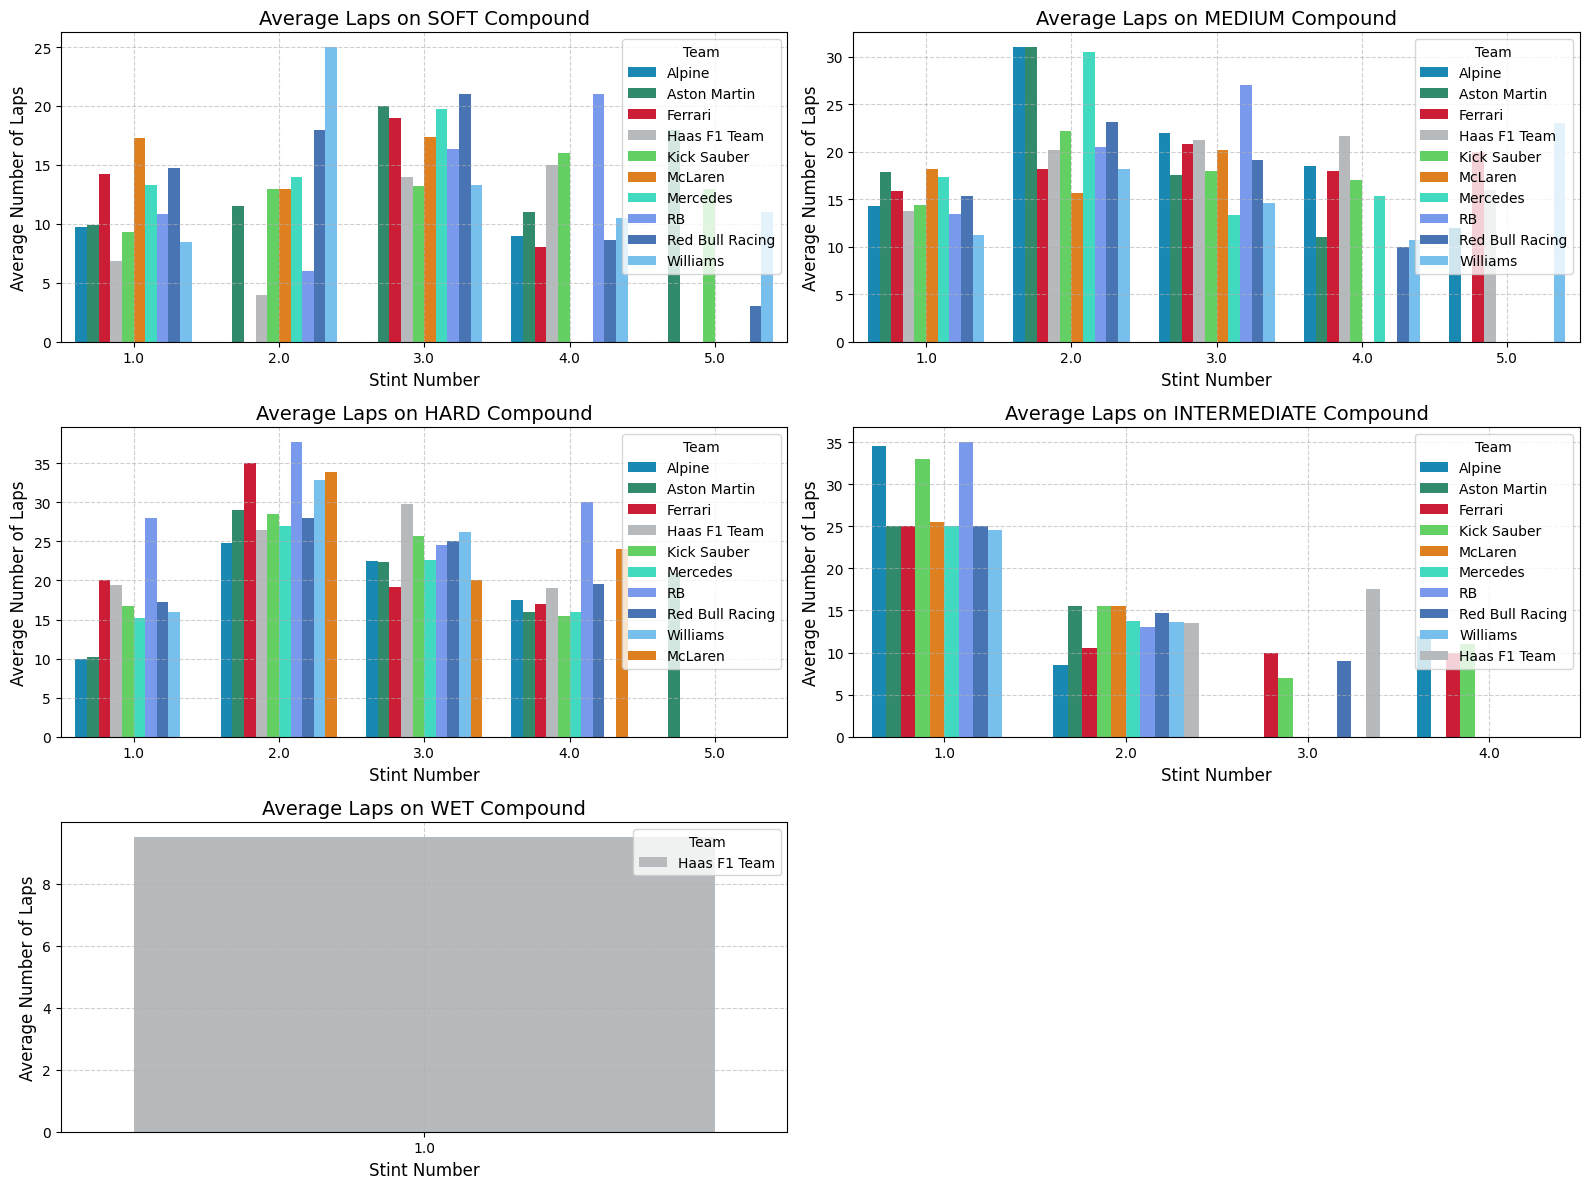

In [ ]:
# Create the visualization
plt.figure(figsize=(16, 12))

# Iterate over each compound and plot its data
for i, compound in enumerate(compound_order, 1):
    plt.subplot(3, 2, i)  # Create a subplot for each compound
    compound_data_team = avg_laps_per_team[avg_laps_per_team['Compound'] == compound]

    sns.barplot(
        data=compound_data_team,
        x='Stint',
        y='LapNumber',
        hue='Team',
        palette=team_colors
    )

    # Add titles and labels
    plt.title(f"Average Laps on {compound} Compound", fontsize=14)
    plt.xlabel("Stint Number", fontsize=12)
    plt.ylabel("Average Number of Laps", fontsize=12)
    plt.legend(title="Team", loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

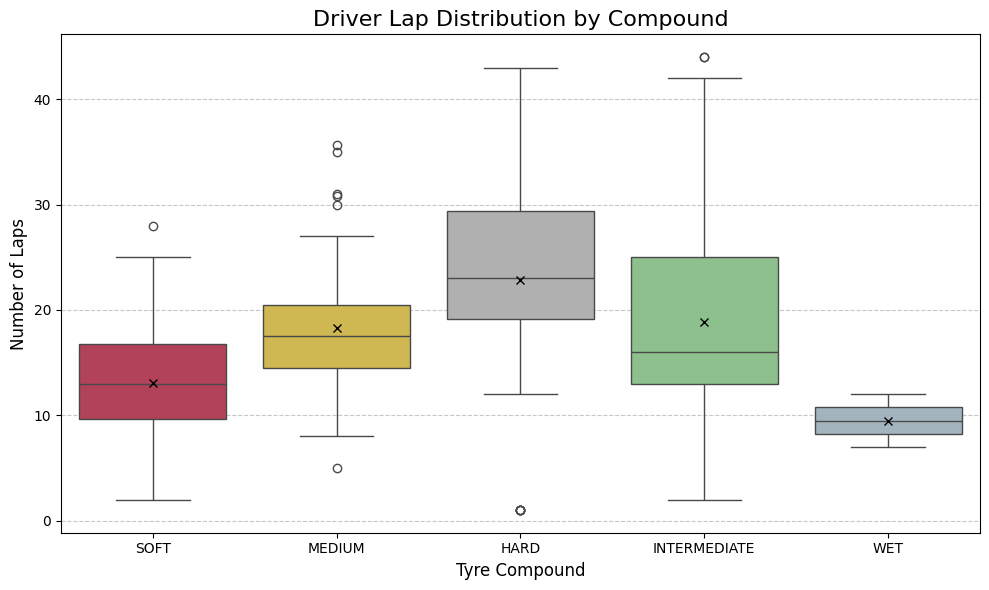

In [ ]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=avg_laps_per_driver,
    x='Compound',
    y='LapNumber',
    hue='Compound',  # Use hue to differentiate compounds
    palette=compound_colors,
    order=compound_order,
    showmeans=True,  # Add a marker for the mean
    meanprops={"marker": "x", "markeredgecolor": "black", "markersize": 6}  # Customize mean marker
)

# Add title and axis labels
plt.title("Driver Lap Distribution by Compound", fontsize=16)
plt.xlabel("Tyre Compound", fontsize=12)
plt.ylabel("Number of Laps", fontsize=12)

# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

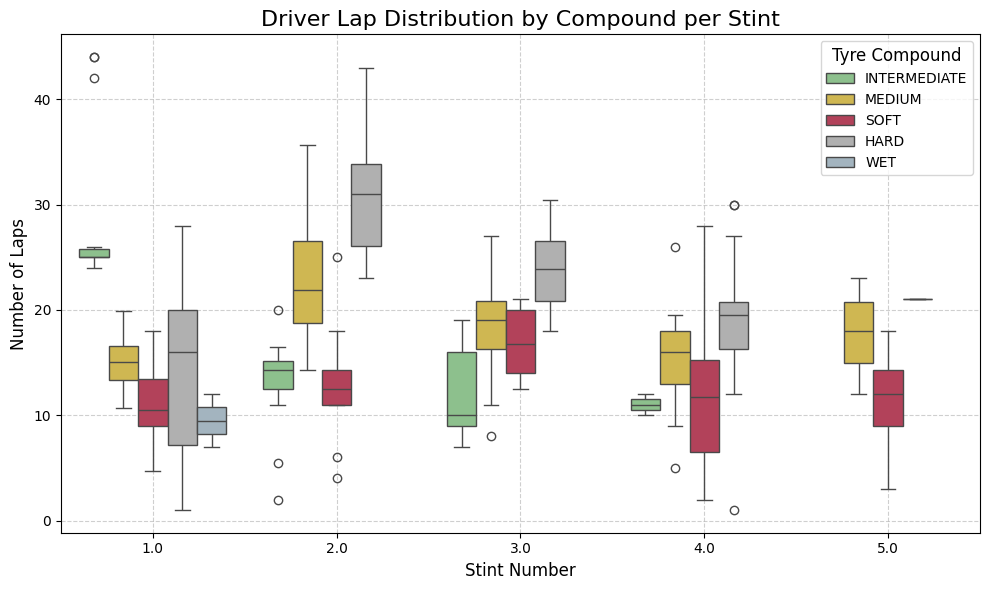

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=avg_laps_per_driver,
    x='Stint',
    y='LapNumber',
    hue='Compound',
    palette=compound_colors
)

plt.title("Driver Lap Distribution by Compound per Stint", fontsize=16)
plt.xlabel("Stint Number", fontsize=12)
plt.ylabel("Number of Laps", fontsize=12)
plt.legend(title="Tyre Compound", fontsize=10, title_fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Pit Stop Analysis

### Total Number of Pit Stops

In [ ]:
# Identify laps with pit stops
pit_stop_data = lap_data.dropna(subset=['PitInTime'])

# Group by driver and team, then count pit stops
pit_stop_counts = pit_stop_data.groupby(['Driver', 'Team']).size().reset_index(name='PitStopTotal')
race_participation = lap_data.groupby('Driver')['EventName'].nunique().reset_index(name='RacesCount')

# Merge the two datasets to calculate pit stops per race
pit_stop_summary = pd.merge(pit_stop_counts, race_participation, on='Driver')
pit_stop_summary['AvgPitStopsPerRace'] = pit_stop_summary['PitStopTotal'] / pit_stop_summary['RacesCount']

In [ ]:
# Sort by average pit stops per race
pit_stop_summary_sorted = pit_stop_summary.sort_values(by='AvgPitStopsPerRace')

# Extract drivers and use their team colors
sorted_drivers = pit_stop_summary_sorted['Driver']
sorted_avg_pit_stops = pit_stop_summary_sorted['AvgPitStopsPerRace']
team_color_mapping = [team_colors[team] for team in pit_stop_summary_sorted['Team']]

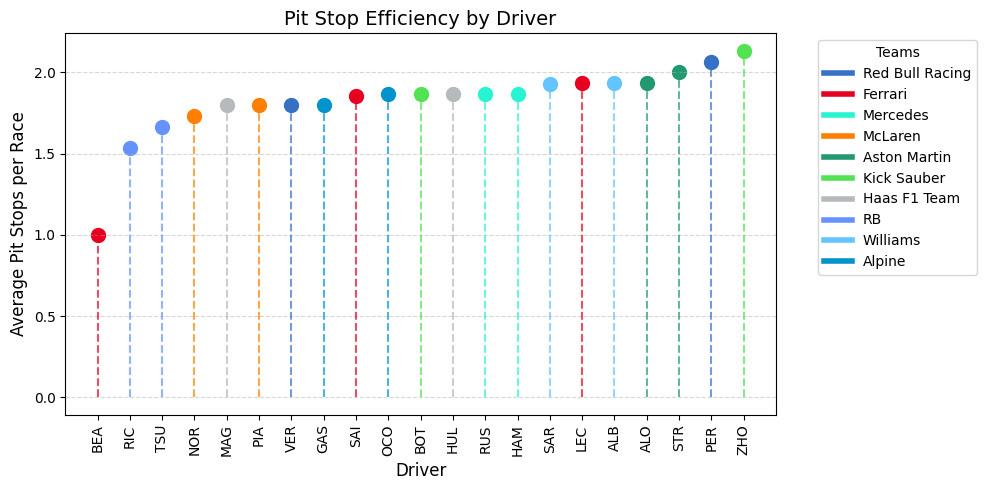

In [ ]:
# Create the lollipop chart
plt.figure(figsize=(10, 5))

# Draw the stems and markers for the lollipop chart
for driver, avg_pit_stops, color in zip(sorted_drivers, sorted_avg_pit_stops, team_color_mapping):
    plt.plot([driver, driver], [0, avg_pit_stops], linestyle='--', color=color, alpha=0.7)  # Stems
    plt.scatter(driver, avg_pit_stops, color=color, s=100)  # Markers

# Add titles and labels
plt.title('Pit Stop Efficiency by Driver', fontsize=14)
plt.xlabel('Driver', fontsize=12)
plt.ylabel('Average Pit Stops per Race', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Create a legend using team colors
legend_handles = [plt.Line2D([0], [0], color=color, lw=4, label=team) for team, color in team_colors.items()]
plt.legend(legend_handles, team_colors.keys(), title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Time Spent in Pits

In [ ]:
pitstop_data = lap_data.copy()

In [ ]:
pitstop_data['PitInTime']  = pd.to_timedelta(pitstop_data['PitInTime'], errors='coerce')
pitstop_data['PitOutTime'] = pd.to_timedelta(pitstop_data['PitOutTime'], errors='coerce')

pitstop_data['PitStopDuration'] = pitstop_data['PitOutTime'].shift(-1) - pitstop_data['PitInTime']

In [ ]:
pitstop_data['PitStopDurationSeconds'] = pitstop_data['PitStopDuration'].dt.total_seconds()

In [ ]:
filtered_pitstop_data = pitstop_data[pitstop_data['PitStopDurationSeconds'] <= 32]

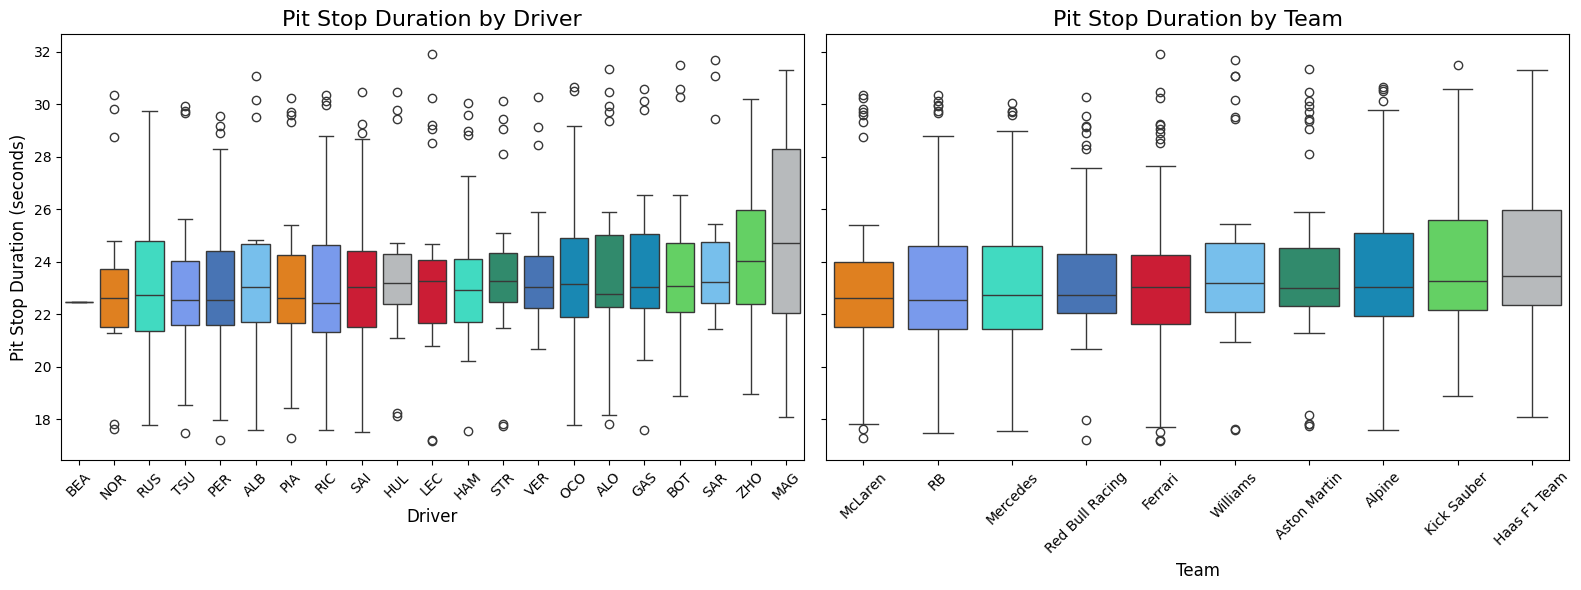

In [ ]:
# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # 1 row, 2 columns, shared y-axis

# Calculate median pit stop durations for drivers and teams
driver_order = (
    filtered_pitstop_data.groupby('Driver')['PitStopDurationSeconds']
    .mean()
    .sort_values()
    .index
)

team_order = (
    filtered_pitstop_data.groupby('Team')['PitStopDurationSeconds']
    .mean()
    .sort_values()
    .index
)

# First plot: Pit Stop Duration by Driver
sns.boxplot(
    data=filtered_pitstop_data,
    x='Driver',
    y='PitStopDurationSeconds',
    hue='Driver',
    palette=driver_colors,
    order=driver_order,
    ax=axes[0]
)
axes[0].set_title("Pit Stop Duration by Driver", fontsize=16)
axes[0].set_xlabel("Driver", fontsize=12)
axes[0].set_ylabel("Pit Stop Duration (seconds)", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Second plot: Pit Stop Duration by Team
sns.boxplot(
    data=filtered_pitstop_data,
    x='Team',
    y='PitStopDurationSeconds',
    hue='Team',
    palette=team_colors,
    order=team_order,
    ax=axes[1]
)
axes[1].set_title("Pit Stop Duration by Team", fontsize=16)
axes[1].set_xlabel("Team", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

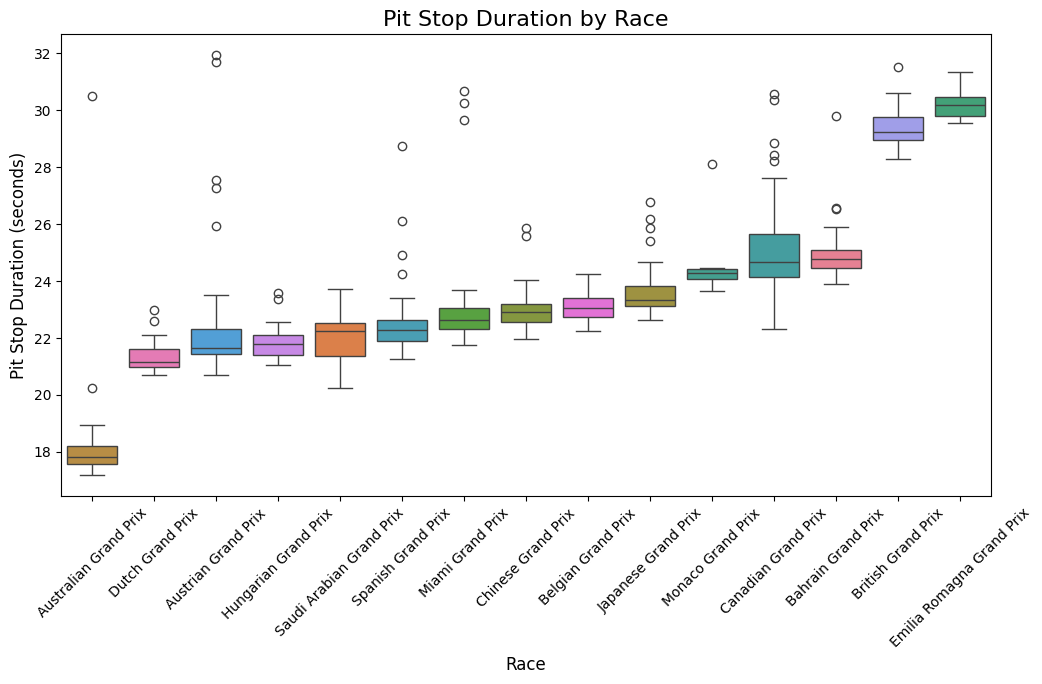

In [ ]:
race_order = (
    filtered_pitstop_data.groupby('EventName')['PitStopDurationSeconds']
    .median()
    .sort_values()
    .index
)

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_pitstop_data, x='EventName', y='PitStopDurationSeconds', hue='EventName', order=race_order)
plt.title("Pit Stop Duration by Race", fontsize=16)
plt.xlabel("Race", fontsize=12)
plt.ylabel("Pit Stop Duration (seconds)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Connections Between Race Factors


## Tyre Compound vs Lap Time

In [ ]:
filtered_lap_time_data = lap_time_data[lap_time_data['LapTimeSeconds'] < 150]

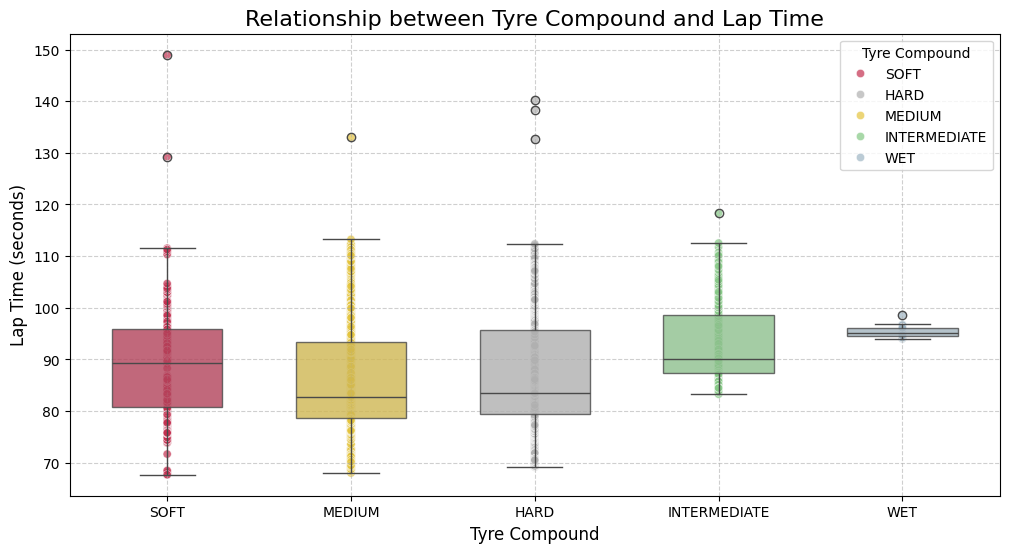

In [ ]:
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=filtered_lap_time_data,
            x='Compound',
            y='LapTimeSeconds',
            hue='Compound',
            palette=compound_colors,
            width=0.6,
            boxprops=dict(alpha=0.8),
            order=compound_order)

# Overlay the scatterplot
sns.scatterplot(data=filtered_lap_time_data,
                x='Compound',
                y='LapTimeSeconds',
                hue='Compound',
                palette=compound_colors,
                alpha=0.7)

# Add title and labels
plt.title('Relationship between Tyre Compound and Lap Time', fontsize=16)
plt.xlabel('Tyre Compound', fontsize=12)
plt.ylabel('Lap Time (seconds)', fontsize=12)
plt.legend(title='Tyre Compound', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

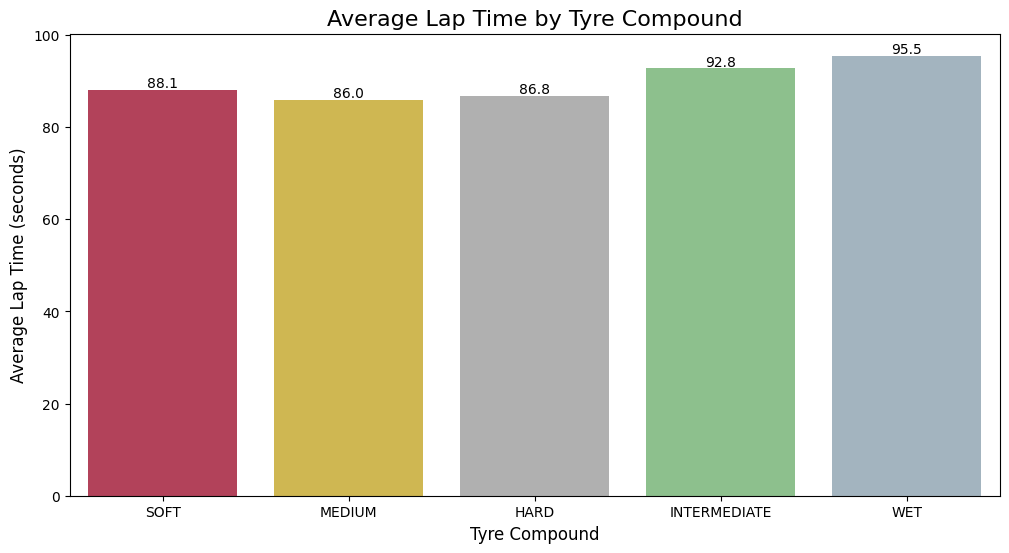

In [ ]:
# Calculate average lap times by tyre compound
avg_lap_time_by_compound = lap_time_data.groupby('Compound')['LapTimeSeconds'].mean().reset_index()

# Set a reasonable threshold for lap times (e.g., below 200 seconds)
avg_lap_time_by_compound = avg_lap_time_by_compound[avg_lap_time_by_compound['LapTimeSeconds'] < 200]

# Plot average lap time by tyre compound
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=avg_lap_time_by_compound,
                      x='Compound',
                      y='LapTimeSeconds',
                      hue='Compound',
                      palette=compound_colors,
                      dodge=False,  # Avoid splitting bars when using hue
                      order=compound_order)

# Annotate the average lap time above each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(
        x=p.get_x() + p.get_width() / 2,  # Center text horizontally
        y=height + 0.5,  # Place text slightly above the bar
        s=f'{height:.1f}',  # Format the value with one decimal
        ha='center',  # Horizontal alignment
        fontsize=10
    )

# Add title and labels
plt.title('Average Lap Time by Tyre Compound', fontsize=16)
plt.xlabel('Tyre Compound', fontsize=12)
plt.ylabel('Average Lap Time (seconds)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Starting Tyre Type vs Final Classification

In [ ]:
# Merge lap data and result data
merged_data = lap_data.merge(
    result_data[['EventName', 'Abbreviation', 'ClassifiedPosition']],
    left_on=['EventName', 'Driver'],
    right_on=['EventName', 'Abbreviation'],
    how='right'
)

# Convert 'ClassifiedPosition' to numeric and drop NaNs
merged_data['ClassifiedPosition'] = pd.to_numeric(merged_data['ClassifiedPosition'], errors='coerce')
merged_data = merged_data.dropna(subset=['ClassifiedPosition'])

In [ ]:
# Filter the first stint data for starting compound analysis
starting_compound_data = merged_data[merged_data['Stint'] == 1]

# Extract unique data for stint-based or compound-based analysis
unique_data = starting_compound_data.drop_duplicates(subset=['EventName', 'Driver', 'Compound', 'ClassifiedPosition'])

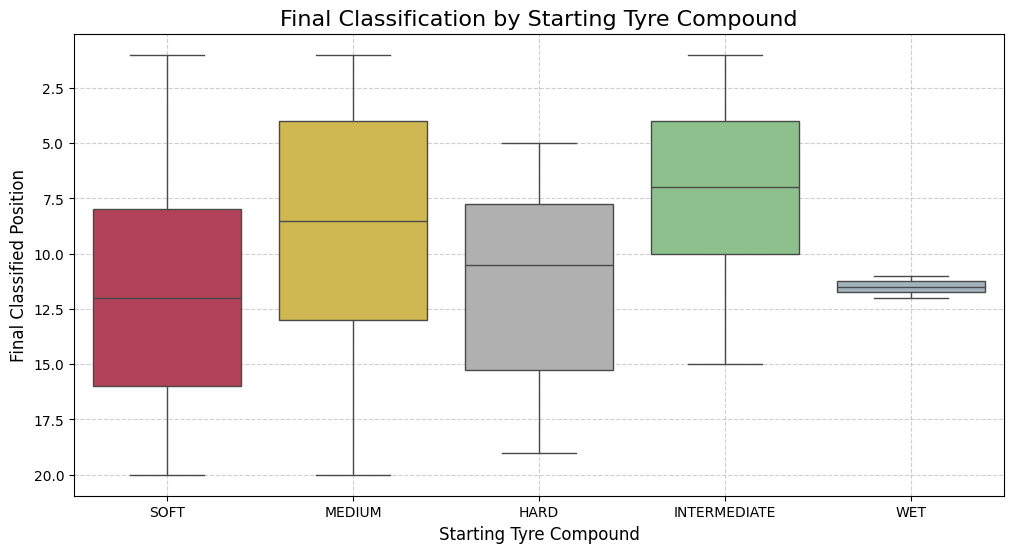

In [ ]:
# Boxplot of Classified Position by Starting Tyre Compound
plt.figure(figsize=(12, 6))
sns.boxplot(data=unique_data,
            x='Compound',
            y='ClassifiedPosition',
            hue='Compound',
            palette=compound_colors,
            order=compound_order)
plt.title('Final Classification by Starting Tyre Compound', fontsize=16)
plt.xlabel('Starting Tyre Compound', fontsize=12)
plt.ylabel('Final Classified Position', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis as lower positions are better
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<ipython-input-194-1574bfc00775>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title='Starting Tyre Type')


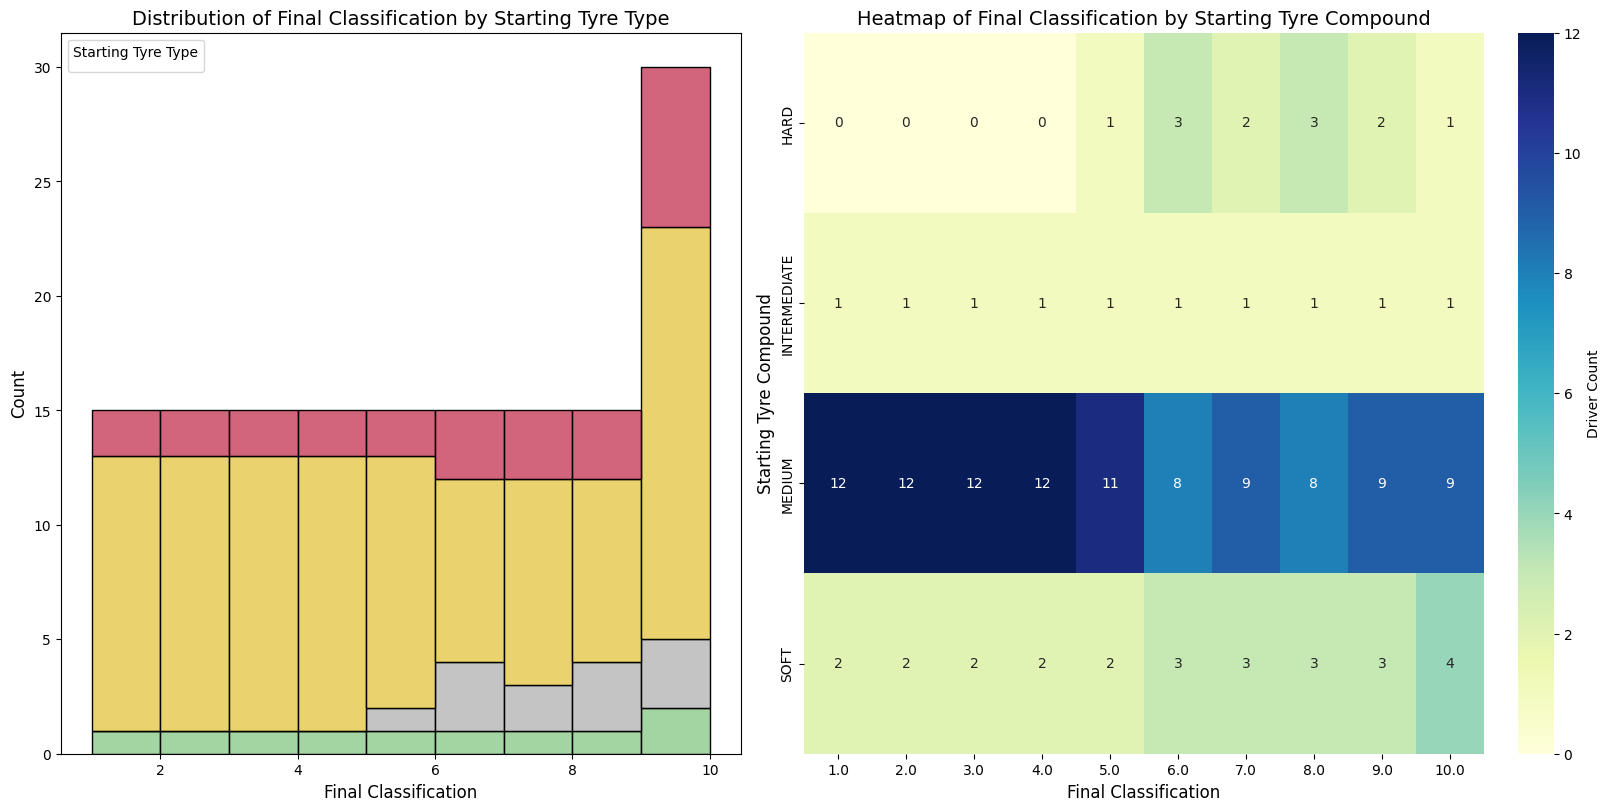

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and subplots for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

# Plot the histogram on the first subplot
sns.histplot(
    data=unique_data[unique_data['ClassifiedPosition'] <= 10],
    x='ClassifiedPosition',
    hue='Compound',
    multiple='stack',
    palette=compound_colors,
    binwidth=1,
    ax=axes[0]
)
axes[0].set_title('Distribution of Final Classification by Starting Tyre Type', fontsize=14)
axes[0].set_xlabel('Final Classification', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Starting Tyre Type')

# Create a heatmap of the same data on the second subplot
heatmap_data = (
    unique_data[unique_data['ClassifiedPosition'] <= 10]
    .groupby(['Compound', 'ClassifiedPosition'])
    .size()
    .unstack(fill_value=0)
)
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    cbar_kws={'label': 'Driver Count'},
    ax=axes[1]
)
axes[1].set_title('Heatmap of Final Classification by Starting Tyre Compound', fontsize=14)
axes[1].set_xlabel('Final Classification', fontsize=12)
axes[1].set_ylabel('Starting Tyre Compound', fontsize=12)

# Show the side-by-side visualizations
plt.show()

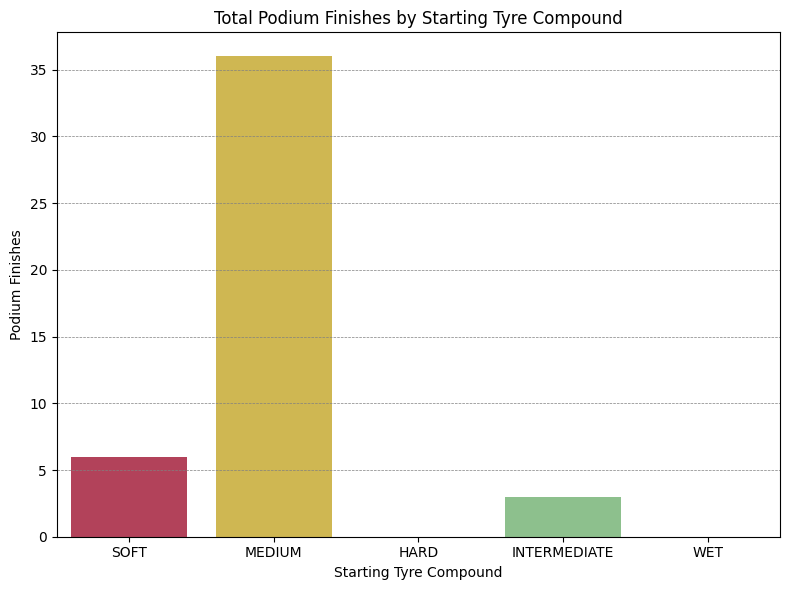

In [ ]:
# Group and calculate total podium finishes by starting compound
podium_summary_starting = (
    unique_data.groupby('Compound')
    .agg(
        PodiumFinishes=('ClassifiedPosition', lambda x: (x <= 3).sum())
    )
    .reset_index()
)

# Plot podium finishes by starting compound
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Compound', y='PodiumFinishes',hue='Compound', data=podium_summary_starting,
    palette=compound_colors, order=compound_order
)
plt.title('Total Podium Finishes by Starting Tyre Compound')
plt.xlabel('Starting Tyre Compound')
plt.ylabel('Podium Finishes')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

## Finishing Tyre Type vs Final Classification

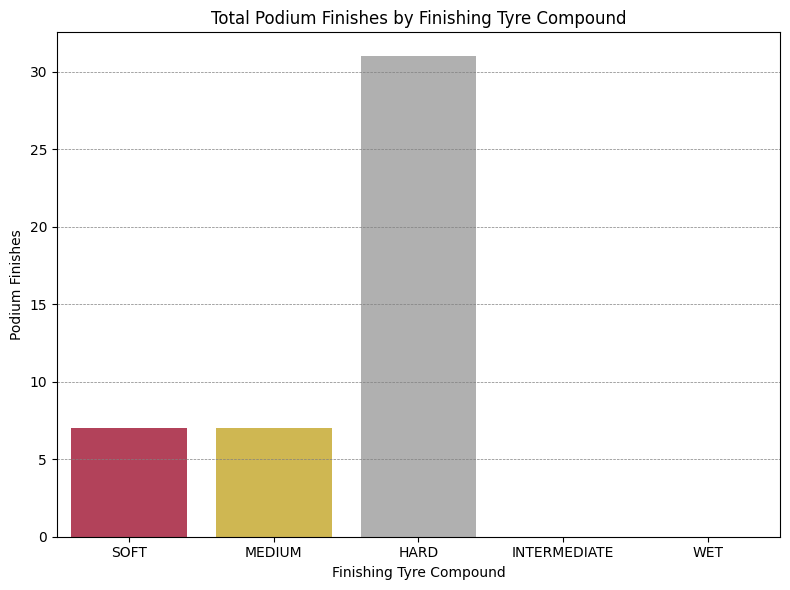

In [ ]:
# Filter the last stint data for finishing compound analysis
finish_stint_data = merged_data.loc[merged_data.groupby(['EventName', 'Driver'])['LapNumber'].idxmax()]

finish_compound_data = finish_stint_data[['EventName', 'Driver', 'Compound', 'ClassifiedPosition']]

# Group and calculate total podium finishes by finishing compound
podium_summary_finishing = (
    finish_compound_data.groupby('Compound')
    .agg(
        PodiumFinishes=('ClassifiedPosition', lambda x: (x <= 3).sum())
    )
    .reset_index()
)

# Plot podium finishes by finishing compound
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Compound', y='PodiumFinishes',hue='Compound', data=podium_summary_finishing,
    palette=compound_colors, order=compound_order
)
plt.title('Total Podium Finishes by Finishing Tyre Compound')
plt.xlabel('Finishing Tyre Compound')
plt.ylabel('Podium Finishes')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

## Number of Stops vs Final Position

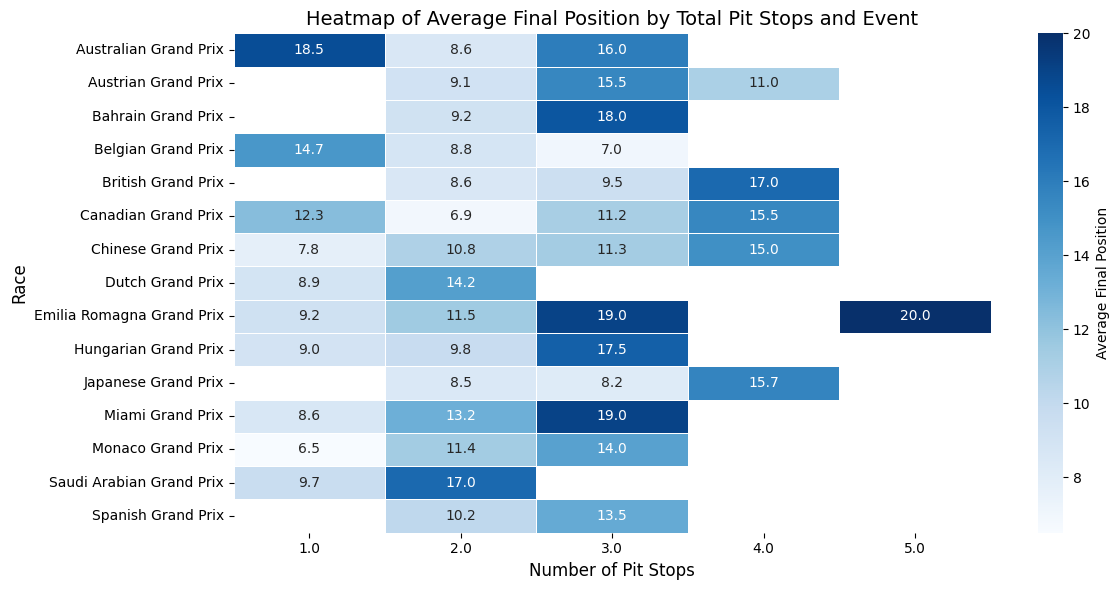

In [ ]:
# Count the number of pit stops for each driver in each race
number_of_pit_stops = (
    lap_data.dropna(subset=['PitInTime'])
    .groupby(['EventName', 'Driver'])
    .size()
    .reset_index(name='PitStops')  # Count the number of pit stops
)

# Merge the pit stop counts into the result data
classified_data = pd.merge(
    result_data,
    number_of_pit_stops,
    right_on=['EventName', 'Driver'],
    left_on=['EventName', 'Abbreviation'],
    how='left'
)

# Filter out rows where PitStops are missing
classified_data = classified_data.dropna(subset=['PitStops','Position'])

# Group by EventName and PitStops to calculate average final (classified) position
average_classified_position = (
    classified_data.groupby(['EventName', 'PitStops'])['Position']
    .mean()
    .reset_index()
)

# Create the heatmap data
heatmap_data = average_classified_position.pivot(
    index='EventName',
    columns='PitStops',
    values='Position'
)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={'label': 'Average Final Position'}
)

plt.title('Heatmap of Average Final Position by Total Pit Stops and Event', fontsize=14)
plt.xlabel('Number of Pit Stops', fontsize=12)
plt.ylabel('Race', fontsize=12)

plt.tight_layout()
plt.show()

## Race Length vs Strategy

In [ ]:
lap_data.head()

EventName                    Time Driver  DriverNumber  \
0  Bahrain Grand Prix  0 days 01:01:37.510000    VER             1   
1  Bahrain Grand Prix  0 days 01:03:13.806000    VER             1   
2  Bahrain Grand Prix  0 days 01:04:50.559000    VER             1   
3  Bahrain Grand Prix  0 days 01:06:27.206000    VER             1   
4  Bahrain Grand Prix  0 days 01:08:04.379000    VER             1   

                  LapTime  LapNumber  Stint PitOutTime PitInTime  \
0  0 days 00:01:37.284000        1.0    1.0        NaN       NaN   
1  0 days 00:01:36.296000        2.0    1.0        NaN       NaN   
2  0 days 00:01:36.753000        3.0    1.0        NaN       NaN   
3  0 days 00:01:36.647000        4.0    1.0        NaN       NaN   
4  0 days 00:01:37.173000        5.0    1.0        NaN       NaN   

              Sector1Time  ... FreshTyre             Team  \
0                     NaN  ...     False  Red Bull Racing   
1  0 days 00:00:30.916000  ...     False  Red Bull Racing   
2  0 days 00:00:30.999000  ...     False  Red Bull Racing   
3  0 days 00:00:30.931000  ...     False  Red Bull Racing   
4  0 days 00:00:31.255000  ...     False  Red Bull Racing   

             LapStartTime            LapStartDate TrackStatus  Position  \
0  0 days 00:59:59.911000 2024-03-02 15:03:42.342          12       1.0   
1  0 days 01:01:37.510000 2024-03-02 15:05:19.941           1       1.0   
2  0 days 01:03:13.806000 2024-03-02 15:06:56.237           1       1.0   
3  0 days 01:04:50.559000 2024-03-02 15:08:32.990           1       1.0   
4  0 days 01:06:27.206000 2024-03-02 15:10:09.637           1       1.0   

   Deleted  DeletedReason  FastF1Generated IsAccurate  
0    False            NaN            False      False  
1    False            NaN            False       True  
2    False            NaN            False       True  
3    False            NaN            False       True  
4    False            NaN            False       True  

[5 rows x 32 columns]

In [ ]:
# Calculate race length in terms of total laps
race_lengths = lap_data.groupby('EventName')['LapNumber'].max().reset_index()
race_lengths.columns = ['EventName', 'TotalLaps']

# Define clusters (Short, Medium, Long) using quantiles
q28 = race_lengths['TotalLaps'].quantile(0.28)  # 33rd percentile
q77 = race_lengths['TotalLaps'].quantile(0.77)  # 66th percentile

def classify_race_length(total_laps):
    if total_laps <= q28:
        return 'Short'
    elif q28 < total_laps < q77:
        return 'Medium'
    else:
        return 'Long'

race_lengths['RaceLength'] = race_lengths['TotalLaps'].apply(classify_race_length)

# Merge back with lap_data for strategy analysis
lap_data_with_length = pd.merge(lap_data, race_lengths, on='EventName', how='left')

# Verify the clusters
race_lengths

EventName  TotalLaps RaceLength
0       Australian Grand Prix       58.0     Medium
1         Austrian Grand Prix       71.0       Long
2          Bahrain Grand Prix       57.0     Medium
3          Belgian Grand Prix       44.0      Short
4          British Grand Prix       52.0      Short
5         Canadian Grand Prix       70.0       Long
6          Chinese Grand Prix       56.0     Medium
7            Dutch Grand Prix       72.0       Long
8   Emilia Romagna Grand Prix       63.0     Medium
9        Hungarian Grand Prix       70.0       Long
10        Japanese Grand Prix       53.0      Short
11           Miami Grand Prix       57.0     Medium
12          Monaco Grand Prix       78.0       Long
13   Saudi Arabian Grand Prix       50.0      Short
14         Spanish Grand Prix       66.0     Medium

In [ ]:
circuit_data.head()

EventName TrackMarker            X            Y  Number Letter  \
0  Bahrain Grand Prix     Corners    42.405939  8329.202564       1    NaN   
1  Bahrain Grand Prix     Corners   820.781621  7879.043841       2    NaN   
2  Bahrain Grand Prix     Corners  1912.969997  8065.442167       3    NaN   
3  Bahrain Grand Prix     Corners  7487.745293  6790.710716       4    NaN   
4  Bahrain Grand Prix     Corners  5820.228443  4860.740936       5    NaN   

        Angle     Distance  
0 -246.615311   710.617854  
1 -101.177469   810.105764  
2 -261.394562   919.675665  
3 -349.599066  1498.172766  
4 -211.501597  1766.151578

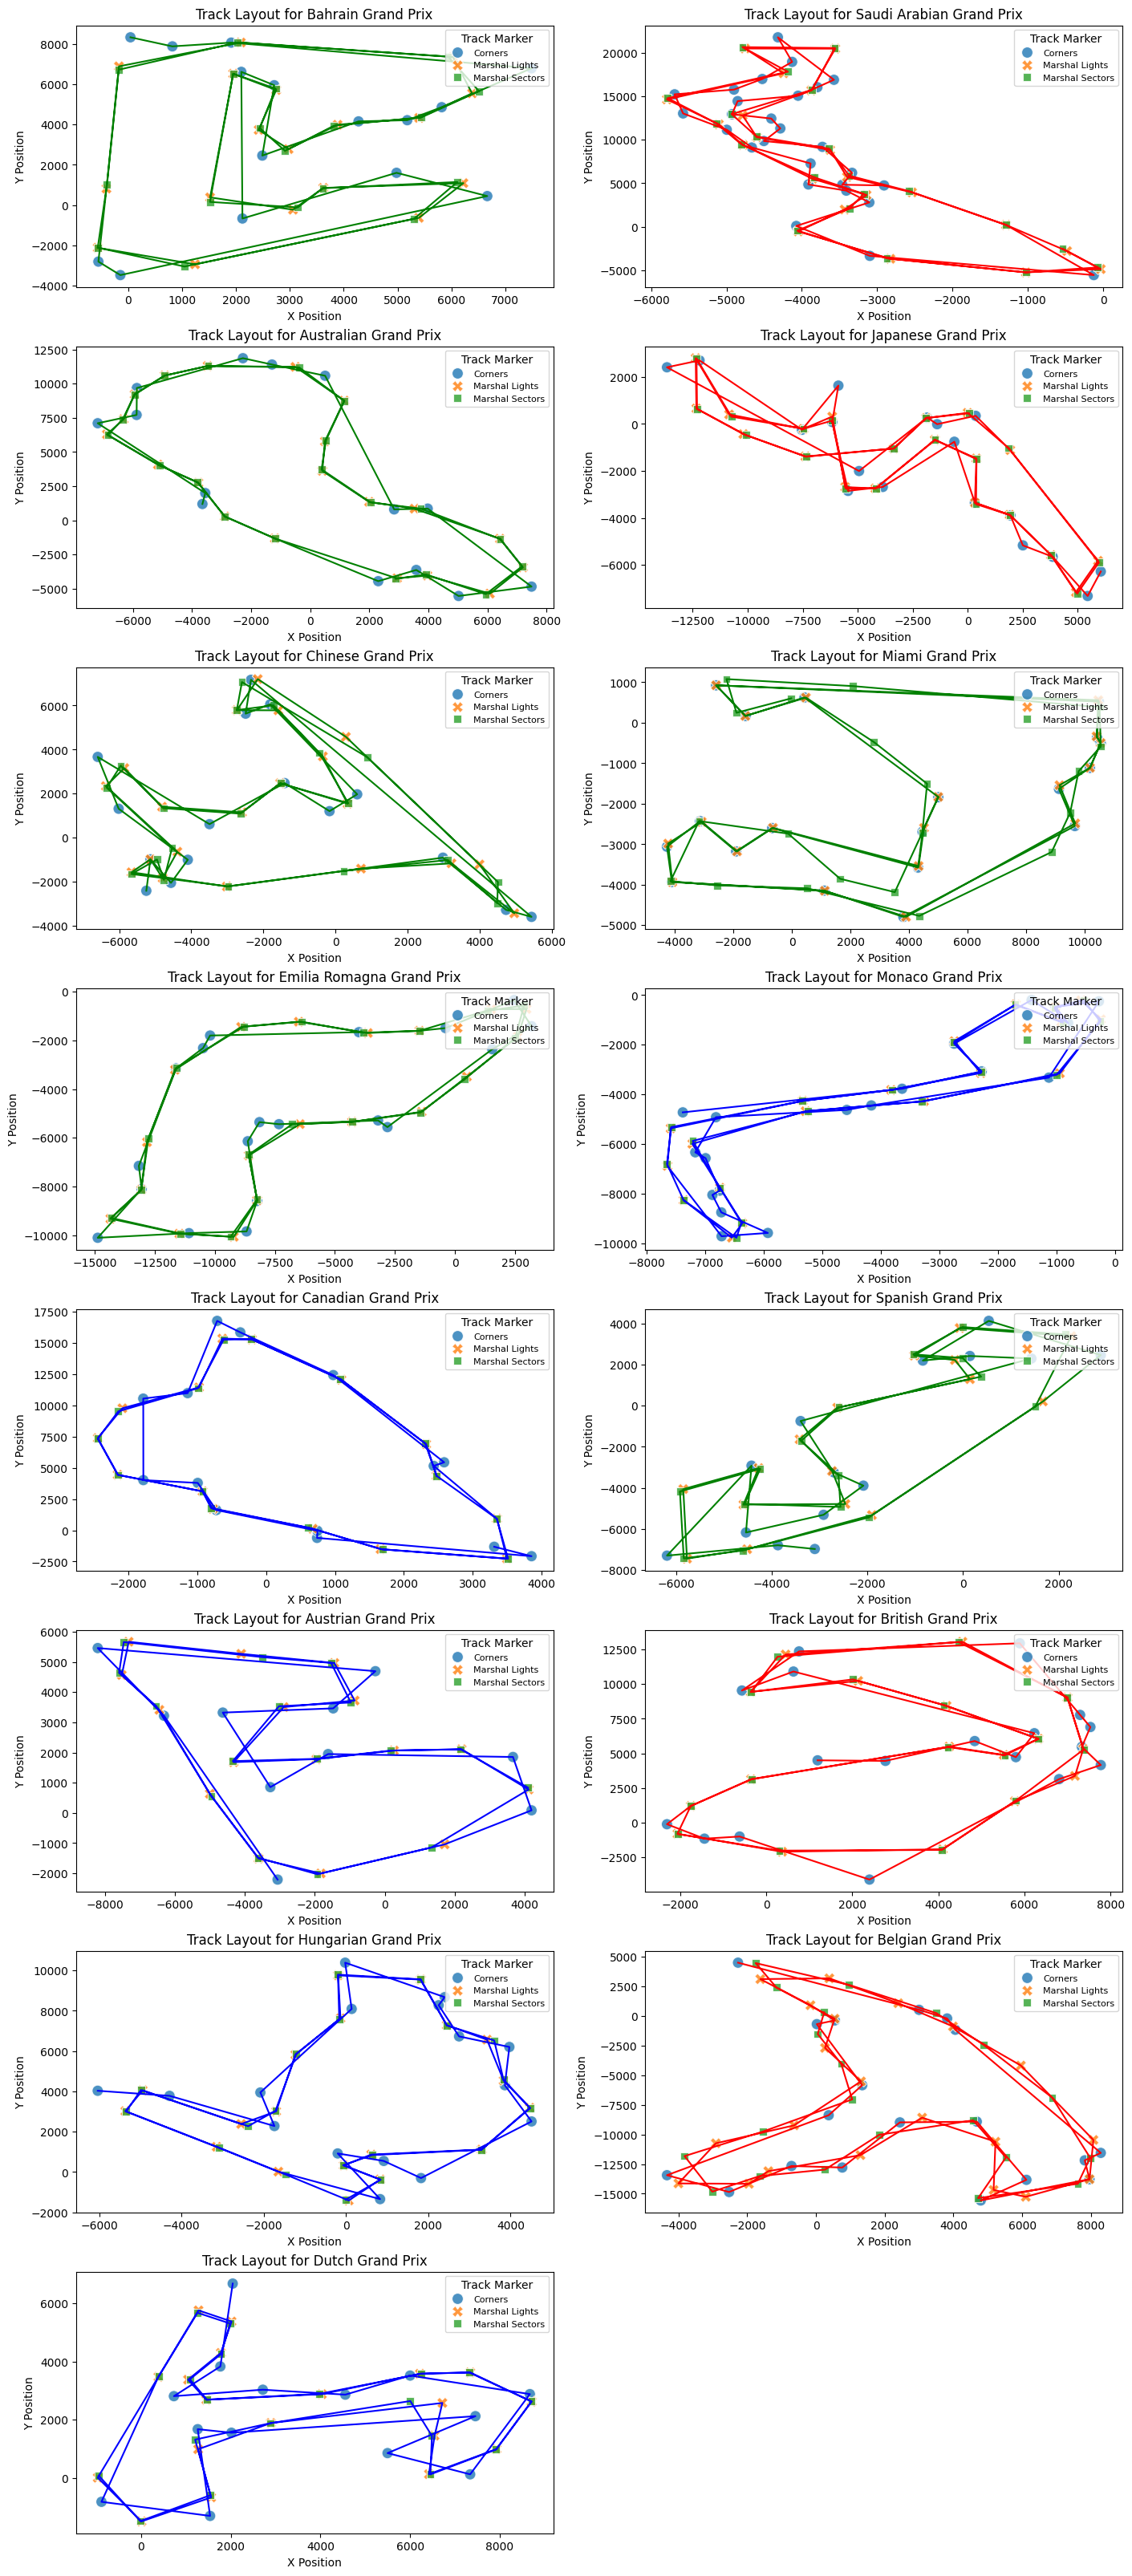

In [ ]:
# Unique tracks
tracks = circuit_data['EventName'].unique()

# Create a dictionary mapping event names to their cluster color
track_colors = {
    row['EventName']: 'blue' if row['RaceLength'] == 'Long'
    else 'green' if row['RaceLength'] == 'Medium'
    else 'red'
    for _, row in race_lengths.iterrows()
}

# Define the number of rows and columns for the grid layout
num_tracks = len(tracks)
cols = 2  # Two tracks per row
rows = math.ceil(num_tracks / cols)  # Calculate the required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows), constrained_layout=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through each track and plot
for i, track in enumerate(tracks):
    ax = axes[i]
    track_data = circuit_data[circuit_data['EventName'] == track]

    # Use the color from the mapping
    track_color = track_colors.get(track, 'gray')  # Default to gray if not found

    # Plot the track layout with the corresponding color
    ax.plot(track_data['X'], track_data['Y'], marker='', color=track_color)  # Add a line to connect the track markers

    # Scatter plot for track markers
    sns.scatterplot(
        data=track_data, x='X', y='Y', hue='TrackMarker', style='TrackMarker',
        s=100, alpha=0.8, ax=ax
    )

    # Add title and labels
    ax.set_title(f'Track Layout for {track}', fontsize=12)
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.legend(title='Track Marker', loc='upper right', fontsize=8)

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.show()

In [ ]:
# Merge data
pit_stop_distribution = pd.merge(
    number_of_pit_stops,
    race_lengths[['EventName', 'RaceLength']],
    on='EventName',
    how='left'
)

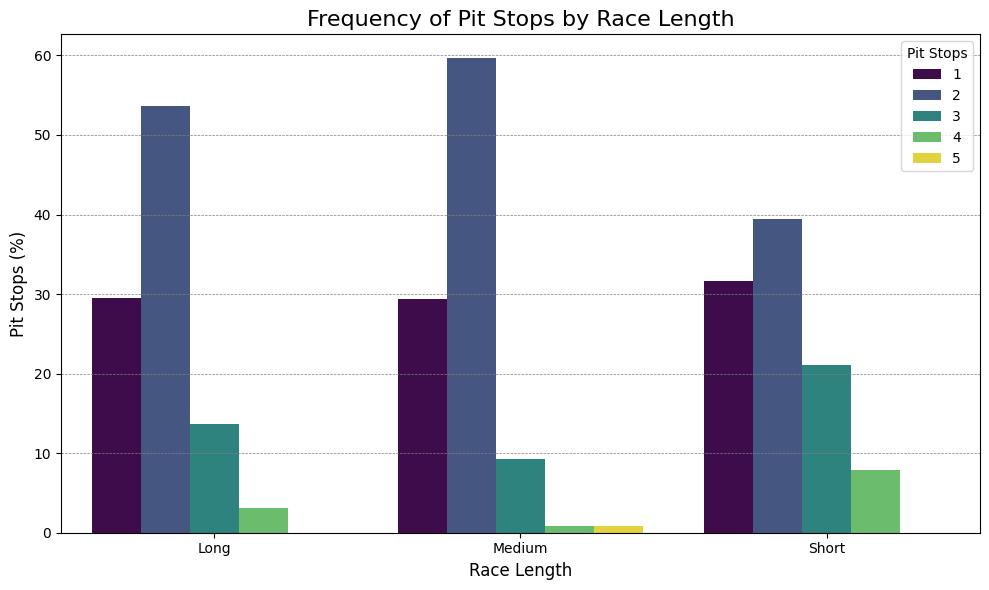

In [ ]:
# Group and count occurrences of pit stops in each RaceLength category
pit_stop_counts = pit_stop_distribution.groupby(['RaceLength', 'PitStops']).size().reset_index(name='Count')

# Normalize the counts to percentages within each RaceLength
total_counts = pit_stop_counts.groupby('RaceLength')['Count'].transform('sum')
pit_stop_counts['Percentage'] = (pit_stop_counts['Count'] / total_counts) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=pit_stop_counts,
    x='RaceLength',
    y='Percentage',
    hue='PitStops',
    palette='viridis',
)

# Add labels and title
plt.title('Frequency of Pit Stops by Race Length', fontsize=16)
plt.xlabel('Race Length', fontsize=12)
plt.ylabel('Pit Stops (%)', fontsize=12)
plt.legend(title='Pit Stops', fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

# Show the plot
plt.tight_layout()
plt.show()

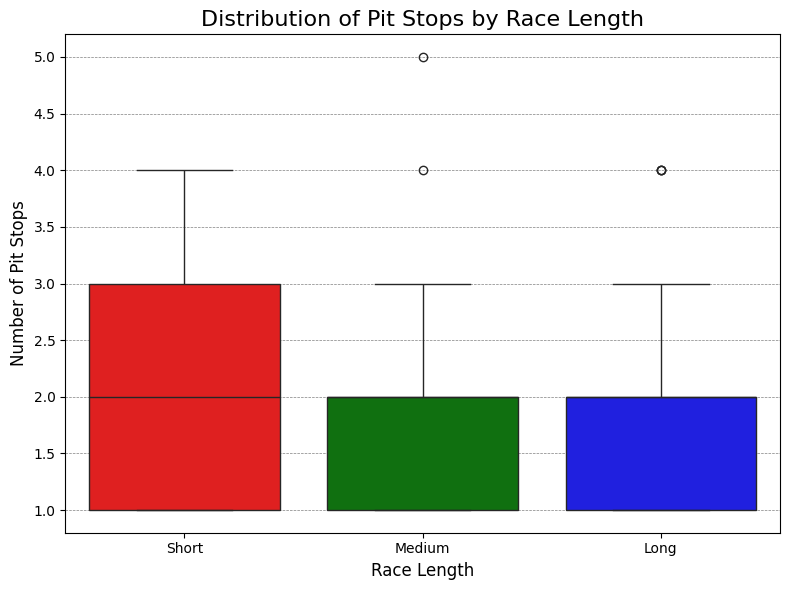

In [ ]:
# Create a box plot for the number of pit stops grouped by RaceLength
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=pit_stop_distribution,
    x='RaceLength',
    hue='RaceLength',
    y='PitStops',
    palette={'Short': 'red', 'Medium': 'green', 'Long': 'blue'},
    order=['Short', 'Medium', 'Long'],
)

# Add labels and title
plt.title('Distribution of Pit Stops by Race Length', fontsize=16)
plt.xlabel('Race Length', fontsize=12)
plt.ylabel('Number of Pit Stops', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

# Show the plot
plt.tight_layout()
plt.show()

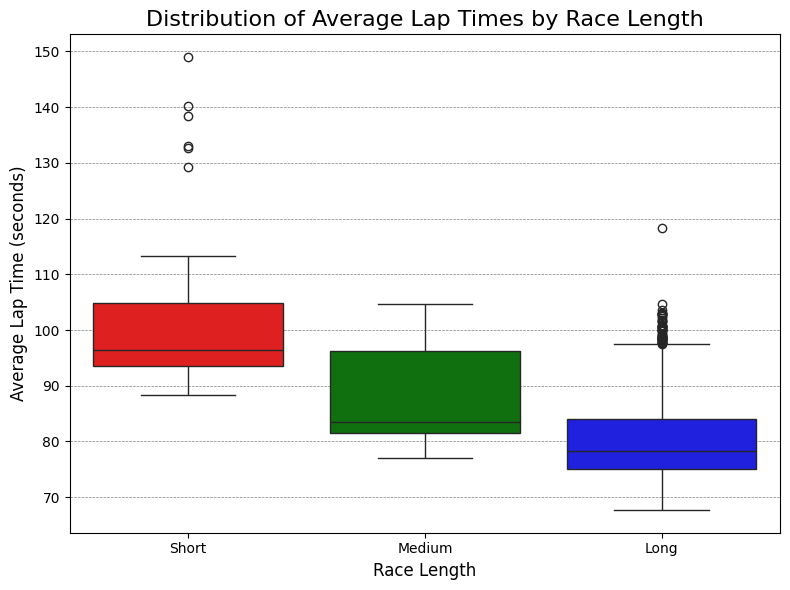

In [ ]:
# Merge lap time data with race length classification
merged_data = pd.merge(
    lap_time_data,
    race_lengths[['EventName', 'RaceLength']],
    on='EventName',
    how='left'
)

# Create a box plot for average lap times grouped by RaceLength
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=merged_data,
    x='RaceLength',
    hue='RaceLength',
    y='LapTimeSeconds',
    palette={'Short': 'red', 'Medium': 'green', 'Long': 'blue'},
    order=['Short', 'Medium', 'Long'],
)

# Add labels and title
plt.title('Distribution of Average Lap Times by Race Length', fontsize=16)
plt.xlabel('Race Length', fontsize=12)
plt.ylabel('Average Lap Time (seconds)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total laps for each race length category
total_laps_by_category = (
    lap_data_with_length.groupby('RaceLength')['LapNumber']
    .count()
    .reset_index()
    .rename(columns={'LapNumber': 'TotalLaps'})
)

# Count laps for each tyre compound in each race length category
compound_usage_summary = (
    lap_data_with_length.groupby(['RaceLength', 'Compound'])['LapNumber']
    .count()
    .reset_index()
    .rename(columns={'LapNumber': 'LapCount'})
)

# Merge total laps with compound usage data
compound_usage_summary = pd.merge(
    compound_usage_summary,
    total_laps_by_category,
    on='RaceLength',
    how='left'
)

# Calculate percentage of laps for each compound within each race length category
compound_usage_summary['LapPercentage'] = (
    compound_usage_summary['LapCount'] / compound_usage_summary['TotalLaps'] * 100
)

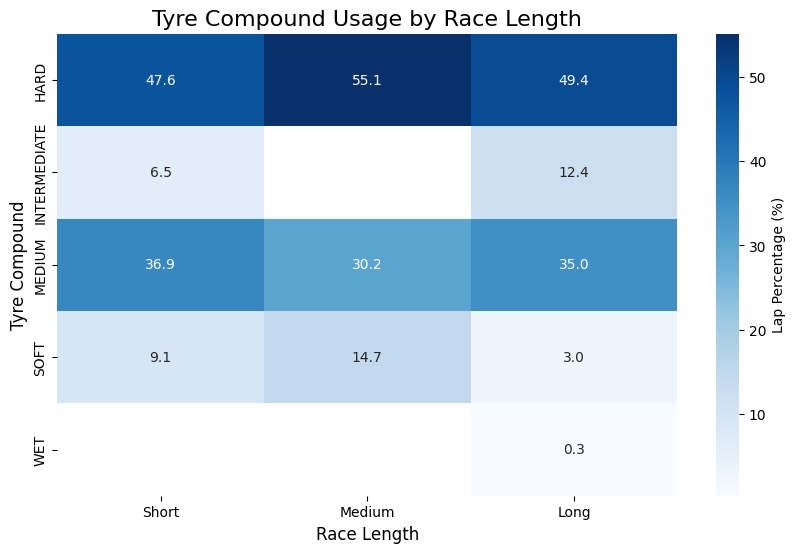

In [ ]:
# Explicitly define the order of the RaceLength categories
compound_usage_summary['RaceLength'] = pd.Categorical(
    compound_usage_summary['RaceLength'],
    categories=['Short', 'Medium', 'Long'],
    ordered=True
)

# Pivot data to create a matrix for heatmap
compound_heatmap_data = compound_usage_summary.pivot(
    index='Compound',
    columns='RaceLength',
    values='LapPercentage'
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    compound_heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='Blues',
    cbar_kws={'label': 'Lap Percentage (%)'}
)

# Add labels and title
plt.title('Tyre Compound Usage by Race Length', fontsize=16)
plt.xlabel('Race Length', fontsize=12)
plt.ylabel('Tyre Compound', fontsize=12)

# Display the heatmap
plt.show()

# Regression Models

In [ ]:
lap_data_copy = lap_data.copy()

In [ ]:
result_data_copy = result_data.copy()

In [ ]:
lap_data_copy = lap_data_copy[lap_data_copy['IsAccurate'] == True]

In [ ]:
lap_data_copy.dropna(subset=['Position'], inplace = True)

In [ ]:
lap_data_copy.drop(['Position'], inplace = True, axis=1)

In [ ]:
lap_data_copy.columns

Index(['EventName', 'Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber',
       'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team',
       'LapStartTime', 'LapStartDate', 'TrackStatus', 'Deleted',
       'DeletedReason', 'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [ ]:
result_data_copy.dropna(subset=['Position'], inplace = True)

In [ ]:
result_data_copy.dropna(subset=['GridPosition'], inplace = True)

In [ ]:
lap_result_data = pd.merge(
    lap_data_copy,
    result_data_copy[['EventName', 'Abbreviation', 'GridPosition', 'Position']],
    left_on=['EventName', 'Driver'],
    right_on=['EventName', 'Abbreviation'],
    how='left'
)

In [ ]:
lap_result_data.head(3)

EventName                    Time Driver  DriverNumber  \
0  Bahrain Grand Prix  0 days 01:03:13.806000    VER             1   
1  Bahrain Grand Prix  0 days 01:04:50.559000    VER             1   
2  Bahrain Grand Prix  0 days 01:06:27.206000    VER             1   

                  LapTime  LapNumber  Stint PitOutTime PitInTime  \
0  0 days 00:01:36.296000        2.0    1.0        NaN       NaN   
1  0 days 00:01:36.753000        3.0    1.0        NaN       NaN   
2  0 days 00:01:36.647000        4.0    1.0        NaN       NaN   

              Sector1Time  ...            LapStartTime  \
0  0 days 00:00:30.916000  ...  0 days 01:01:37.510000   
1  0 days 00:00:30.999000  ...  0 days 01:03:13.806000   
2  0 days 00:00:30.931000  ...  0 days 01:04:50.559000   

             LapStartDate TrackStatus Deleted DeletedReason  FastF1Generated  \
0 2024-03-02 15:05:19.941           1   False           NaN            False   
1 2024-03-02 15:06:56.237           1   False           NaN            False   
2 2024-03-02 15:08:32.990           1   False           NaN            False   

   IsAccurate  Abbreviation  GridPosition Position  
0        True           VER           1.0      1.0  
1        True           VER           1.0      1.0  
2        True           VER           1.0      1.0  

[3 rows x 34 columns]

In [ ]:
lap_result_data.drop(['Time'], inplace = True, axis=1)

In [ ]:
lap_result_data.columns

Index(['EventName', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'Abbreviation', 'GridPosition',
       'Position'],
      dtype='object')

In [ ]:
# Ensure LapStartTime and Time are timedelta objects
lap_result_data['LapStartTime'] = pd.to_timedelta(lap_result_data['LapStartTime'])
weather_data['Time'] = pd.to_timedelta(weather_data['Time'])

# Merge based on Timedelta format
lap_weather_merged = pd.merge_asof(
    lap_result_data.sort_values('LapStartTime'),
    weather_data.sort_values('Time'),
    by='EventName',          # Match based on event name
    left_on='LapStartTime',  # Lap start time
    right_on='Time',         # Weather data time
    direction='backward'     # Match with the closest earlier weather timestamp
)

In [ ]:
lap_weather_merged.head(3)

EventName Driver  DriverNumber                 LapTime  \
0  Canadian Grand Prix    RUS            63  0 days 00:01:36.556000   
1  Canadian Grand Prix    VER             1  0 days 00:01:37.672000   
2  Canadian Grand Prix    NOR             4  0 days 00:01:38.203000   

   LapNumber  Stint PitOutTime PitInTime             Sector1Time  \
0        2.0    1.0        NaN       NaN  0 days 00:00:28.287000   
1        2.0    1.0        NaN       NaN  0 days 00:00:28.815000   
2        2.0    1.0        NaN       NaN  0 days 00:00:28.599000   

              Sector2Time  ... Position                   Time AirTemp  \
0  0 days 00:00:30.597000  ...      3.0 0 days 00:05:06.641000    16.3   
1  0 days 00:00:31.274000  ...      1.0 0 days 00:05:06.641000    16.3   
2  0 days 00:00:31.697000  ...      2.0 0 days 00:05:06.641000    16.3   

  Humidity  Pressure  Rainfall  TrackTemp  WindDirection WindSpeed  \
0     74.0     996.4      True       20.7            179       1.8   
1     74.0     996.4      True       20.7            179       1.8   
2     74.0     996.4      True       20.7            179       1.8   

  Time (Minutes)  
0       5.110683  
1       5.110683  
2       5.110683  

[3 rows x 42 columns]

In [ ]:
lap_weather_merged['LapTime'] = pd.to_timedelta(lap_weather_merged['LapTime'])
lap_weather_merged['LapTimeSeconds'] = lap_weather_merged['LapTime'].dt.total_seconds()

In [ ]:
lap_weather_merged.shape

(15235, 43)

In [ ]:
lap_weather_merged.columns

Index(['EventName', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'Abbreviation', 'GridPosition',
       'Position', 'Time', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall',
       'TrackTemp', 'WindDirection', 'WindSpeed', 'Time (Minutes)',
       'LapTimeSeconds'],
      dtype='object')

In [ ]:
number_of_pit_stops

EventName Driver  PitStops
0    Australian Grand Prix    ALB         2
1    Australian Grand Prix    ALO         2
2    Australian Grand Prix    BOT         2
3    Australian Grand Prix    GAS         2
4    Australian Grand Prix    HAM         1
..                     ...    ...       ...
285     Spanish Grand Prix    SAR         2
286     Spanish Grand Prix    STR         2
287     Spanish Grand Prix    TSU         3
288     Spanish Grand Prix    VER         2
289     Spanish Grand Prix    ZHO         2

[290 rows x 3 columns]

In [ ]:
number_of_pit_stops.isnull().sum()

EventName    0
Driver       0
PitStops     0
dtype: int64

In [ ]:
model_data = lap_weather_merged[['EventName','Driver', 'LapTimeSeconds', 'DriverNumber',
                                 'GridPosition', 'Position', 'LapNumber', 'Stint',
                                 'Compound', 'TyreLife', 'FreshTyre',
                                 'Sector1Time', 'Sector2Time', 'Sector3Time',
                                 'WindSpeed', 'TrackTemp',
                                 'SpeedFL', 'SpeedI1', 'SpeedI2', 'SpeedST']]

In [ ]:
model_data.head(3)

EventName Driver  LapTimeSeconds  DriverNumber  GridPosition  \
0  Canadian Grand Prix    RUS          96.556            63           1.0   
1  Canadian Grand Prix    VER          97.672             1           2.0   
2  Canadian Grand Prix    NOR          98.203             4           3.0   

   Position  LapNumber  Stint      Compound  TyreLife  FreshTyre  \
0       3.0        2.0    1.0  INTERMEDIATE       2.0       True   
1       1.0        2.0    1.0  INTERMEDIATE       2.0       True   
2       2.0        2.0    1.0  INTERMEDIATE       2.0       True   

              Sector1Time             Sector2Time             Sector3Time  \
0  0 days 00:00:28.287000  0 days 00:00:30.597000  0 days 00:00:37.672000   
1  0 days 00:00:28.815000  0 days 00:00:31.274000  0 days 00:00:37.583000   
2  0 days 00:00:28.599000  0 days 00:00:31.697000  0 days 00:00:37.907000   

   WindSpeed  TrackTemp  SpeedFL  SpeedI1  SpeedI2  SpeedST  
0        1.8       20.7    253.0    198.0    264.0    290.0  
1        1.8       20.7    263.0    189.0    263.0    294.0  
2        1.8       20.7    263.0    197.0    264.0    291.0

In [ ]:
# Merge the pit stop dataset with the main dataset
model_data = pd.merge(
    model_data,  # Your main dataset
    number_of_pit_stops,  # Dataset with pit stops information
    how='left',  # Keep all rows from model_data, match rows from pit stops data
    on=['EventName', 'Driver'],  # Columns shared by both datasets
)

In [ ]:
model_data.head(3)

EventName Driver  LapTimeSeconds  DriverNumber  GridPosition  \
0  Canadian Grand Prix    RUS          96.556            63           1.0   
1  Canadian Grand Prix    VER          97.672             1           2.0   
2  Canadian Grand Prix    NOR          98.203             4           3.0   

   Position  LapNumber  Stint      Compound  TyreLife  ...  \
0       3.0        2.0    1.0  INTERMEDIATE       2.0  ...   
1       1.0        2.0    1.0  INTERMEDIATE       2.0  ...   
2       2.0        2.0    1.0  INTERMEDIATE       2.0  ...   

              Sector1Time             Sector2Time             Sector3Time  \
0  0 days 00:00:28.287000  0 days 00:00:30.597000  0 days 00:00:37.672000   
1  0 days 00:00:28.815000  0 days 00:00:31.274000  0 days 00:00:37.583000   
2  0 days 00:00:28.599000  0 days 00:00:31.697000  0 days 00:00:37.907000   

  WindSpeed  TrackTemp  SpeedFL  SpeedI1  SpeedI2  SpeedST  PitStops  
0       1.8       20.7    253.0    198.0    264.0    290.0       3.0  
1       1.8       20.7    263.0    189.0    263.0    294.0       2.0  
2       1.8       20.7    263.0    197.0    264.0    291.0       2.0  

[3 rows x 21 columns]

In [ ]:
model_data.shape

(15235, 21)

In [ ]:
# Group by EventName and Driver to calculate PositionChange
model_data['PositionChange'] = model_data.groupby(['EventName', 'DriverNumber'])['GridPosition'].transform('first') - model_data.groupby(['EventName', 'DriverNumber'])['Position'].transform('last')

In [ ]:
model_data.head(3)

EventName Driver  LapTimeSeconds  DriverNumber  GridPosition  \
0  Canadian Grand Prix    RUS          96.556            63           1.0   
1  Canadian Grand Prix    VER          97.672             1           2.0   
2  Canadian Grand Prix    NOR          98.203             4           3.0   

   Position  LapNumber  Stint      Compound  TyreLife  ...  \
0       3.0        2.0    1.0  INTERMEDIATE       2.0  ...   
1       1.0        2.0    1.0  INTERMEDIATE       2.0  ...   
2       2.0        2.0    1.0  INTERMEDIATE       2.0  ...   

              Sector2Time             Sector3Time WindSpeed TrackTemp  \
0  0 days 00:00:30.597000  0 days 00:00:37.672000       1.8      20.7   
1  0 days 00:00:31.274000  0 days 00:00:37.583000       1.8      20.7   
2  0 days 00:00:31.697000  0 days 00:00:37.907000       1.8      20.7   

   SpeedFL  SpeedI1  SpeedI2  SpeedST  PitStops  PositionChange  
0    253.0    198.0    264.0    290.0       3.0            -2.0  
1    263.0    189.0    263.0    294.0       2.0             1.0  
2    263.0    197.0    264.0    291.0       2.0             1.0  

[3 rows x 22 columns]

In [ ]:
model_data.drop(['Driver'], axis=1, inplace = True)

In [ ]:
model_data.head(3)

EventName  LapTimeSeconds  DriverNumber  GridPosition  Position  \
0  Canadian Grand Prix          96.556            63           1.0       3.0   
1  Canadian Grand Prix          97.672             1           2.0       1.0   
2  Canadian Grand Prix          98.203             4           3.0       2.0   

   LapNumber  Stint      Compound  TyreLife  FreshTyre  ...  \
0        2.0    1.0  INTERMEDIATE       2.0       True  ...   
1        2.0    1.0  INTERMEDIATE       2.0       True  ...   
2        2.0    1.0  INTERMEDIATE       2.0       True  ...   

              Sector2Time             Sector3Time WindSpeed  TrackTemp  \
0  0 days 00:00:30.597000  0 days 00:00:37.672000       1.8       20.7   
1  0 days 00:00:31.274000  0 days 00:00:37.583000       1.8       20.7   
2  0 days 00:00:31.697000  0 days 00:00:37.907000       1.8       20.7   

   SpeedFL  SpeedI1  SpeedI2  SpeedST  PitStops  PositionChange  
0    253.0    198.0    264.0    290.0       3.0            -2.0  
1    263.0    189.0    263.0    294.0       2.0             1.0  
2    263.0    197.0    264.0    291.0       2.0             1.0  

[3 rows x 21 columns]

In [ ]:
model_data.isnull().sum()

EventName            0
LapTimeSeconds       0
DriverNumber         0
GridPosition         0
Position             0
LapNumber            0
Stint                0
Compound             0
TyreLife             0
FreshTyre            0
Sector1Time          0
Sector2Time          0
Sector3Time          0
WindSpeed            0
TrackTemp            0
SpeedFL              0
SpeedI1           2639
SpeedI2              0
SpeedST           1153
PitStops            26
PositionChange       0
dtype: int64

In [ ]:
model_data.dropna(subset='PitStops', inplace = True)

In [ ]:
# Convert Sector times to timedelta
model_data['Sector1Time'] = pd.to_timedelta(model_data['Sector1Time'])
model_data['Sector2Time'] = pd.to_timedelta(model_data['Sector2Time'])
model_data['Sector3Time'] = pd.to_timedelta(model_data['Sector3Time'])

# Now convert to seconds (float)
model_data['Sector1Time'] = model_data['Sector1Time'].dt.total_seconds()
model_data['Sector2Time'] = model_data['Sector2Time'].dt.total_seconds()
model_data['Sector3Time'] = model_data['Sector3Time'].dt.total_seconds()

In [ ]:
# Verify the conversion
model_data[['Sector1Time', 'Sector2Time', 'Sector3Time']].head(3)

Sector1Time  Sector2Time  Sector3Time
0       28.287       30.597       37.672
1       28.815       31.274       37.583
2       28.599       31.697       37.907

In [ ]:
le = LabelEncoder()
model_data['Compound'] = le.fit_transform(model_data['Compound'])

In [ ]:
model_data['FreshTyre'] = model_data['FreshTyre'].astype(int)

In [ ]:
# Calculate delta time per lap, grouped by Event, Driver, Stint, and Compound
model_data['LapDelta'] = model_data.groupby(['EventName', 'DriverNumber', 'Stint', 'Compound'])['LapTimeSeconds'].diff()

In [ ]:
# Fill NaN values in LapDelta (e.g., for the first lap of a group) with 0 or another value if needed
model_data['LapDelta'] = model_data['LapDelta'].fillna(0)

In [ ]:
# List of speed columns to impute
speed_columns = ['SpeedI1', 'SpeedST']

# Impute missing values in each speed column with the driver's median
for col in speed_columns:
    model_data[col] = model_data.groupby('DriverNumber')[col].transform(lambda x: x.fillna(x.median()))

# Verify that there are no remaining NaN values in the speed columns
print(model_data[speed_columns].isnull().sum())

SpeedI1    0
SpeedST    0
dtype: int64


In [ ]:
model_data.head()

EventName  LapTimeSeconds  DriverNumber  GridPosition  Position  \
0  Canadian Grand Prix          96.556            63           1.0       3.0   
1  Canadian Grand Prix          97.672             1           2.0       1.0   
2  Canadian Grand Prix          98.203             4           3.0       2.0   
3  Canadian Grand Prix          98.591            81           4.0       5.0   
4  Canadian Grand Prix         100.628            14           6.0       6.0   

   LapNumber  Stint  Compound  TyreLife  FreshTyre  ...  Sector3Time  \
0        2.0    1.0         1       2.0          1  ...       37.672   
1        2.0    1.0         1       2.0          1  ...       37.583   
2        2.0    1.0         1       2.0          1  ...       37.907   
3        2.0    1.0         1       2.0          1  ...       37.408   
4        2.0    1.0         1       2.0          1  ...       39.069   

   WindSpeed  TrackTemp  SpeedFL  SpeedI1  SpeedI2  SpeedST  PitStops  \
0        1.8       20.7    253.0    198.0    264.0    290.0       3.0   
1        1.8       20.7    263.0    189.0    263.0    294.0       2.0   
2        1.8       20.7    263.0    197.0    264.0    291.0       2.0   
3        1.8       20.7    264.0    194.0    263.0    293.0       2.0   
4        1.8       20.7    256.0    184.0    264.0    285.0       2.0   

   PositionChange  LapDelta  
0            -2.0       0.0  
1             1.0       0.0  
2             1.0       0.0  
3            -1.0       0.0  
4             0.0       0.0  

[5 rows x 22 columns]

### Lap Time Analysis

#### Random Forest Regressor

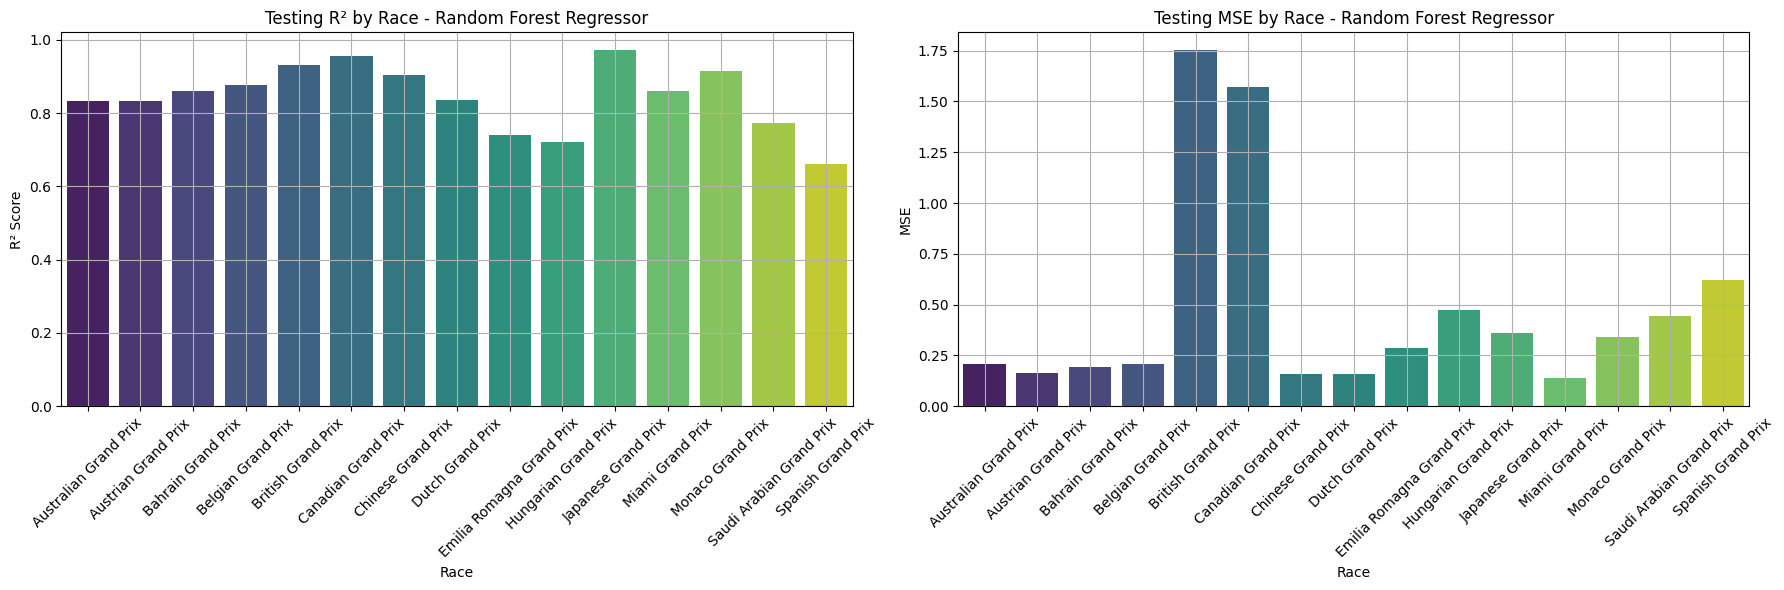

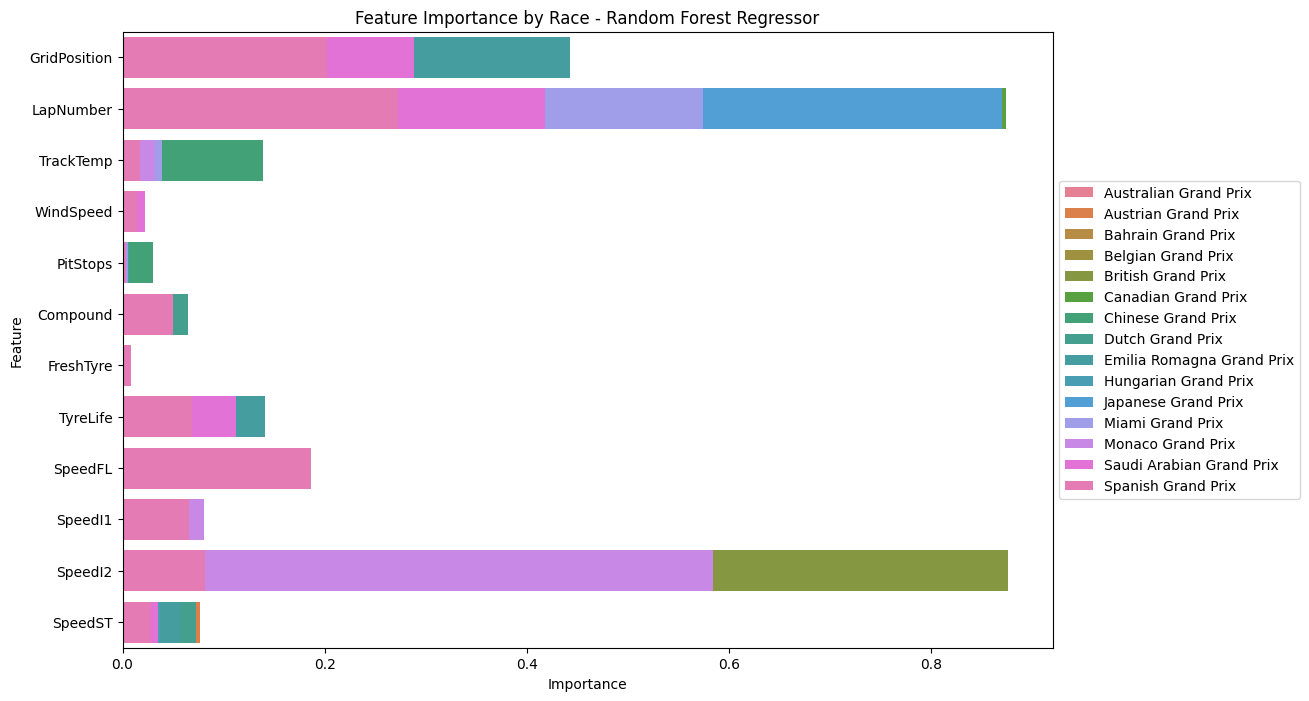

In [ ]:
# Store feature importances and performance metrics per race
race_results = []
race_feature_importances = []

# Group data by EventName (race)
for race, group in model_data.groupby('EventName'):
    # print(f"Training Gradient Boosting Regressor for {race}")

    # Define features (X) and target (y) for this race
    X_race = group[['GridPosition', 'LapNumber',
                    'TrackTemp', 'WindSpeed', 'PitStops',
                    'Compound', 'FreshTyre', 'TyreLife',
                    'SpeedFL', 'SpeedI1', 'SpeedI2', 'SpeedST']]
    y_race = group['LapTimeSeconds']

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_race)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_race, test_size=0.2, random_state=42)

    # Initialize and train the Gradient Boosting Regressor
    model = RandomForestRegressor(
      n_estimators=200,
      random_state=42
    )
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # print(f"Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
    # print(f"Testing MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

    # Store performance metrics for this race
    race_results.append({
        'Race': race,
        'Train_MSE': train_mse,
        'Train_R2': train_r2,
        'Test_MSE': test_mse,
        'Test_R2': test_r2
    })

    # Collect feature importances for this race
    feature_importances = pd.DataFrame({
        'Feature': X_race.columns,
        'Importance': model.feature_importances_,
        'EventName': race
    })
    race_feature_importances.append(feature_importances)

# Combine all results into a single DataFrame
race_results = pd.DataFrame(race_results)
race_feature_importances = pd.concat(race_feature_importances)

# Create the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Plot R² scores
sns.barplot(ax=axes[0], data=race_results, x='Race', y='Test_R2', hue='Race', palette='viridis')
axes[0].set_title('Testing R² by Race - Random Forest Regressor')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('R² Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Plot MSE scores
sns.barplot(ax=axes[1], data=race_results, x='Race', y='Test_MSE', hue='Race', palette='viridis')
axes[1].set_title('Testing MSE by Race - Random Forest Regressor')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('MSE')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Visualize feature importance by race
plt.figure(figsize=(12, 8))
sns.barplot(data=race_feature_importances, x='Importance', y='Feature', hue='EventName', dodge=False)
plt.title('Feature Importance by Race - Random Forest Regressor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Gradient Boosting

Training Performance:
Mean Squared Error: 0.13447843241497853
R-squared: 0.9987250888784929

Testing Performance:
Mean Squared Error: 0.14935545425015065
R-squared: 0.9985442644974717


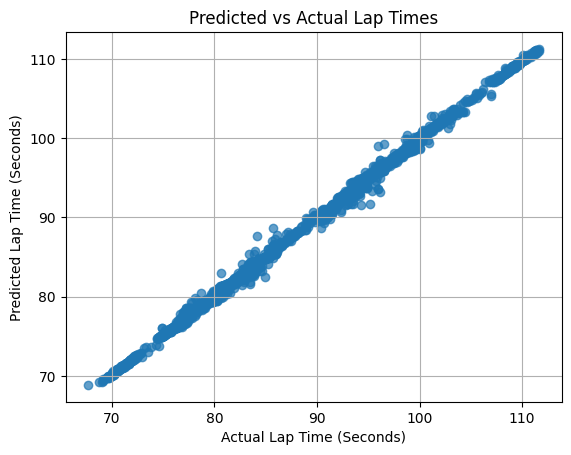

In [ ]:
# Define features (X) and target (y)
X = model_data[['Sector1Time', 'Sector2Time', 'Sector3Time']]
y = model_data['LapTimeSeconds']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=100,    # Number of boosting stages
    learning_rate=0.05,  # Shrinks the contribution of each tree
    max_depth=5,         # Maximum depth of individual regression trees
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance:")
print(f"Mean Squared Error: {train_mse}")
print(f"R-squared: {train_r2}")

print("\nTesting Performance:")
print(f"Mean Squared Error: {test_mse}")
print(f"R-squared: {test_r2}")

# Visualize predictions
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel('Actual Lap Time (Seconds)')
plt.ylabel('Predicted Lap Time (Seconds)')
plt.title('Predicted vs Actual Lap Times')
plt.grid(True)
plt.show()

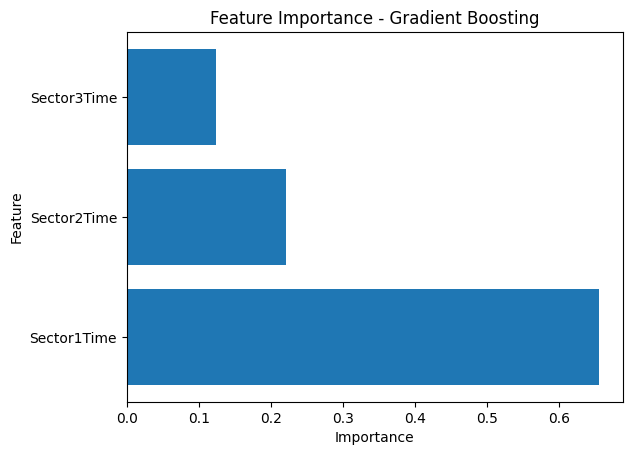

In [ ]:
feature_importances = model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Gradient Boosting')
plt.show()

### Position Change Analysis

#### Random Forest Regressor - Position Change

In [ ]:
# Load your preprocessed dataset
X = model_data[['GridPosition', 'Sector1Time', 'Sector2Time', 'Sector3Time',
                'WindSpeed', 'TrackTemp', 'PitStops','LapTimeSeconds']] # Releavant features
y = model_data['PositionChange']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

print("\nFeature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

Model Performance:
Mean Squared Error: 0.10419612097304405
R-squared: 0.9939460325601107

Feature Importances:
GridPosition: 0.5960
Sector1Time: 0.0687
Sector2Time: 0.0673
Sector3Time: 0.0875
WindSpeed: 0.0078
TrackTemp: 0.0471
PitStops: 0.0805
LapTimeSeconds: 0.0451


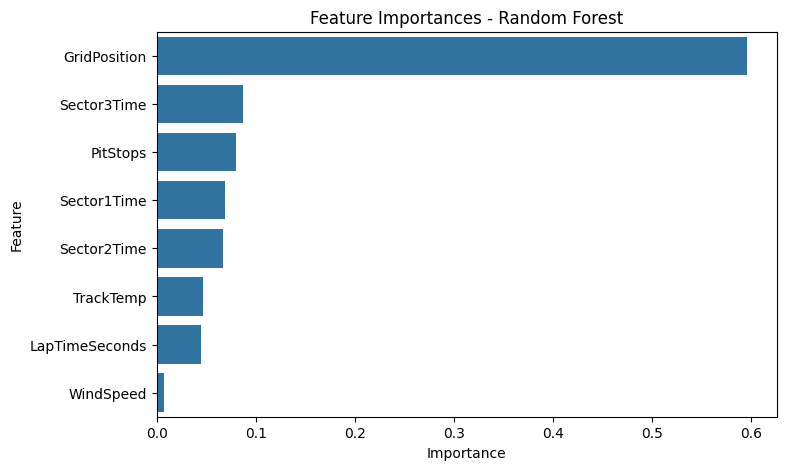

In [ ]:
# # Feature Importance Plot
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Feature Importances - Random Forest')
plt.show()

In [ ]:
scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R-squared: {scores.mean()} (std: {scores.std()})")

Cross-Validation R-squared: 0.9618876523723688 (std: 0.030145471255561815)


In [ ]:
# Training set predictions
y_train_pred = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training MSE: {train_mse}")
print(f"Training R-squared: {train_r2}")

# Test set predictions
y_test_pred = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")

# Compare metrics
print("\nComparison of Training vs Test Metrics:")
print(f"Training MSE: {train_mse} | Test MSE: {test_mse}")
print(f"Training R-squared: {train_r2} | Test R-squared: {test_r2}")

Training MSE: 0.023124303443741265
Training R-squared: 0.9986077102399371
Test MSE: 0.10419612097304405
Test R-squared: 0.9939460325601107

Comparison of Training vs Test Metrics:
Training MSE: 0.023124303443741265 | Test MSE: 0.10419612097304405
Training R-squared: 0.9986077102399371 | Test R-squared: 0.9939460325601107


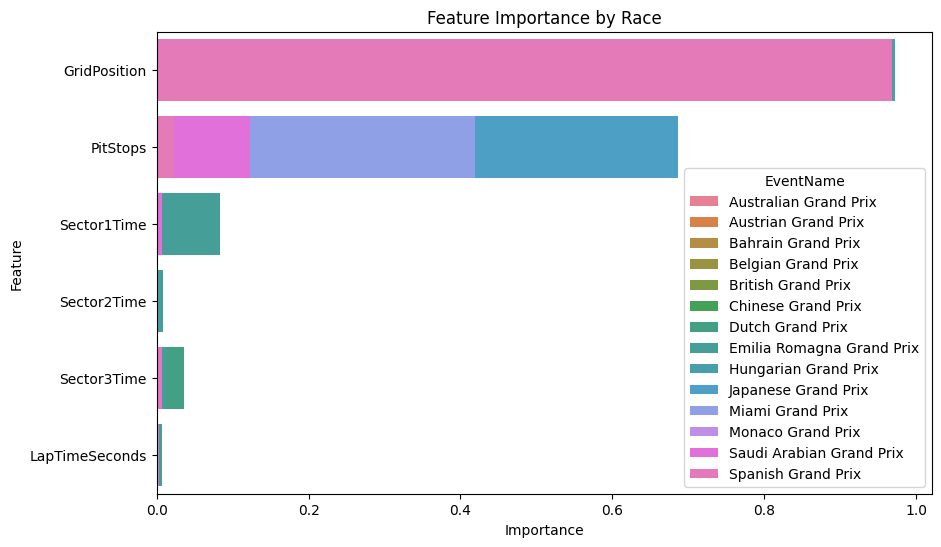

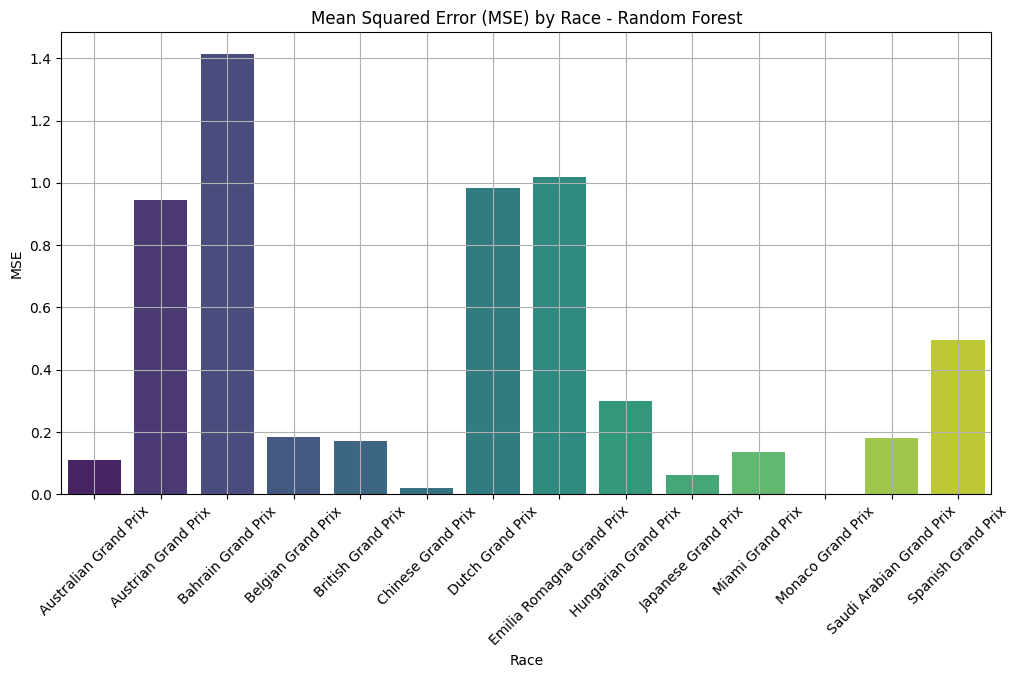

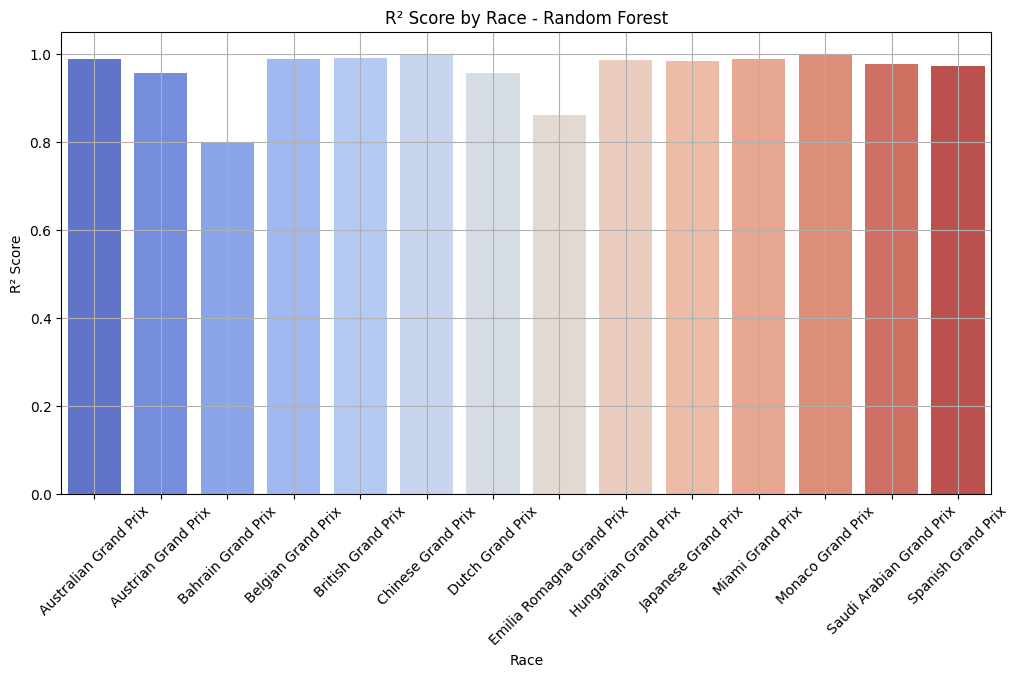

In [ ]:
# Store feature importances, MSE, and R² per race
race_feature_importances = []
race_mse_results = []
race_r2_results = []


# Group data by EventName (each race separately)
for race, group in race_data.groupby('EventName'):
    X_race = group[['GridPosition', 'Sector1Time', 'Sector2Time', 'Sector3Time',
                   'PitStops', 'LapTimeSeconds']]
    y_race = group['PositionChange']

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_race)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_race, test_size=0.2, random_state=42)

    # Train a separate Random Forest for each race
    rf_race = RandomForestRegressor(max_depth=6, random_state=42)
    rf_race.fit(X_train, y_train)

    # Make predictions and calculate MSE and R²
    y_test_pred = rf_race.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store MSE and R² for this race
    race_mse_results.append({'Race': race, 'MSE': test_mse})
    race_r2_results.append({'Race': race, 'R2': test_r2})

    # Collect feature importances for this race
    race_importances = pd.DataFrame({
        'Feature': X_race.columns,
        'Importance': rf_race.feature_importances_,
        'EventName': race
    }).sort_values(by='Importance', ascending=False)
    race_feature_importances.append(race_importances)

# Convert lists to DataFrames
race_feature_importances = pd.concat(race_feature_importances)
race_mse_results = pd.DataFrame(race_mse_results)
race_r2_results = pd.DataFrame(race_r2_results)

# Visualize feature importance by race
plt.figure(figsize=(10, 6))
sns.barplot(data=race_feature_importances, x='Importance', y='Feature', hue='EventName', dodge=False)
plt.title('Feature Importance by Race')
plt.show()

# Plot MSE per race
plt.figure(figsize=(12, 6))
sns.barplot(data=race_mse_results, x='Race', y='MSE', hue='Race', palette='viridis')
plt.title('Mean Squared Error (MSE) by Race - Random Forest')
plt.xlabel('Race')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot R² Score per race
plt.figure(figsize=(12, 6))
sns.barplot(data=race_r2_results, x='Race', y='R2', hue='Race', palette='coolwarm')
plt.title('R² Score by Race - Random Forest')
plt.xlabel('Race')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()